# Curso: Temas Selectos I: O25 LAT4032 1

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Title Page</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            line-height: 1.5;
            text-align: center;
        }
        .title-page {
            margin: 0 auto;
            padding: 2em;
        }
        .title-page h1 {
            font-size: 1.5em;
            margin-bottom: 0.5em;
        }
        .title-page h2 {
            font-size: 1.2em;
            margin-bottom: 0.5em;
        }
        .title-page p {
            font-size: 1em;
            margin: 0.5em 0;
        }
        .title-page .date {
            margin-top: 2em;
            font-size: 1.2em;
        }
    </style>
</head>
<body>
    <div class="title-page">
        <h2>Profesor: Rubén Blancas Rivera</h2>
        <p>Mayren Herrera Vargas, ID: 173802</p>
        <p>Sofia Graham Coello, ID: 174291</p>
        <p>Heriberto Espino Montelongo, ID: 175199</p>
        <p>Universidad de las Américas Puebla</p>
        <p>10 de Octubre de 2025</p>
    </div>
</body>
</html>

# Importar las librerías 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm
from math import gamma, e
from matplotlib import colors

# Ejercicio 1

Demuestre el resultado usado en la derivación del método de Box–Muller. Si $(X,Y)$ es un vector aleatorio continuo con densidad
$$
f(x,y)=\frac{1}{2\pi}\exp\!\left\{-\frac{1}{2}(x^2+y^2)\right\},\quad -\infty<x,y<\infty,
$$
entonces el vector
$$
(R,\Theta)=\big(\sqrt{X^2+Y^2},\ \tan^{-1}(Y/X)\big),\quad X\neq 0,
$$
tiene densidad
$$
f(r,\theta)=\frac{r}{2\pi}\exp\!\left\{-\frac{r^2}{2}\right\},\quad (r,\theta)\in(0,\infty)\times(0,2\pi].
$$


**Transformación e inversa.**  

Defina
$$
R=\sqrt{X^{2}+Y^{2}},\qquad \Theta=\operatorname{atan2}(Y,X)\in(0,2\pi].
$$
La inversa es
$$
X=R\cos\Theta,\qquad Y=R\sin\Theta,
$$
con dominio $\mathcal{D}=\{(r,\theta):r>0,\ \theta\in(0,2\pi]\}$.

**Jacobiano del cambio de variables.**

Construya la matriz jacobiana de $T^{-1}:(r,\theta)\mapsto(x,y)$:
$$
J(r,\theta)=
\begin{pmatrix}
\partial x/\partial r & \partial x/\partial \theta\\[2pt]
\partial y/\partial r & \partial y/\partial \theta
\end{pmatrix}
=
\begin{pmatrix}
\cos\theta & -r\sin\theta\\
\sin\theta & \ \ r\cos\theta
\end{pmatrix}.
$$
Su determinante es
$$
\det J(r,\theta)=r\big(\cos^{2}\theta+\sin^{2}\theta\big)=r.
$$
Por tanto, el factor jacobiano absoluto es $|\det J(r,\theta)|=r$.

**Fórmula de cambio de variables.**  

Para $(r,\theta)\in\mathcal{D}$,
$$
f_{R,\Theta}(r,\theta)
=
f_{X,Y}\big(x,y\big)\,\big|\det J(r,\theta)\big|
\ \ \text{evaluando en}\ \ (x,y)=(r\cos\theta,r\sin\theta).
$$
Sustituyendo,
$$
x^{2}+y^{2}=(r\cos\theta)^{2}+(r\sin\theta)^{2}=r^{2},
$$
de modo que
$$
f_{X,Y}(r\cos\theta,r\sin\theta)=\frac{1}{2\pi}\exp\!\left(-\frac{1}{2}r^{2}\right).
$$
Multiplicando por el jacobiano:
$$
f_{R,\Theta}(r,\theta)=r \cdot \frac{1}{2\pi}\exp\!\left(-\frac{1}{2}r^{2}\right)

$$

**Verificación de normalización.**  

Integre sobre $\mathcal{D}$:
$$
\int_{0}^{2\pi}\!\!\int_{0}^{\infty}\frac{r}{2\pi}e^{-r^{2}/2}\,dr\,d\theta
=\left(\int_{0}^{2\pi}\frac{d\theta}{2\pi}\right)\left(\int_{0}^{\infty} r e^{-r^{2}/2}\,dr\right).
$$
Para la integral radial use la sustitución $u=\tfrac{1}{2}r^{2}\Rightarrow du=r\,dr$:
$$
\int_{0}^{\infty} r e^{-r^{2}/2}\,dr=\int_{0}^{\infty} e^{-u}\,du=1.
$$
La integral angular vale $1$. Producto $1\cdot 1=1$. Es una densidad válida.

**Consecuencias inmediatas.**  

Factorización:
$$
f_{R,\Theta}(r,\theta)=\underbrace{\left(\frac{1}{2\pi}\right)}_{f_{\Theta}(\theta)}\ \underbrace{\left(r e^{-r^{2}/2}\right)}_{f_{R}(r)},\quad r>0,\ \theta\in(0,2\pi],
$$
por lo que $R$ y $\Theta$ son independientes,
$$
\Theta\sim \mathrm{Unif}(0,2\pi],\qquad R\sim\text{Rayleigh}(\sigma=1),
$$
con densidad $f_{R}(r)=r e^{-r^{2}/2}$ para $r>0$.

**Conexión con Box–Muller.**  

Si $U_{1},U_{2}\sim\mathrm{Unif}(0,1)$ independientes y se define
$$
R=\sqrt{-2\ln U_{1}},\qquad \Theta=2\pi U_{2},
$$
entonces $R$ tiene la densidad $r e^{-r^{2}/2}$ y $\Theta$ es uniforme e independiente. Por la inversa polar,
$$
X=R\cos\Theta,\qquad Y=R\sin\Theta
$$
tienen precisamente la densidad conjunta inicial, i.e., $X,Y$ son normales estándar independientes. 

# Ejercicio 2

Demuestre que si $W\sim\mathrm{Exp}(\lambda)$ con $\lambda=\tfrac12$, entonces $R=\sqrt{W}$ tiene densidad
$$
f(r)=r\exp\!\left\{-\frac{r^2}{2}\right\},\quad r\ge 0.
$$
Por el método de la función inversa, un valor de $W$ se puede expresar como $W=-2\ln u$ con $u\sim\mathrm{Unif}(0,1)$. Por tanto,
$$
R=\sqrt{-2\ln u}.
$$

Densidad y CDF de (W).
Para $\lambda=\tfrac12$:
$$
f_W(w)=\tfrac12 e^{-w/2},\mathbf 1_{(0,\infty)}(w),\qquad
F_W(w)=\mathbb P(W\le w)=\big(1-e^{-w/2}\big)\mathbf 1_{[0,\infty)}(w).
$$

**Definición de (R).**

$R=\sqrt{W}$ toma valores en $[0,\infty$). Para $r<0$, $\mathbb P(R\le r)=0$.

**Método 1: CDF y derivada.**  

Para $r\ge 0$:
$$
F_R(r)=\mathbb P(R\le r)=\mathbb P(\sqrt{W}\le r)=\mathbb P(W\le r^{2})=F_W(r^{2})=1-e^{-r^{2}/2}.
$$
Derive respecto a (r) en $(0,\infty)$:
$$
f_R(r)=F_R'(r)=\left(-e^{-r^{2}/2}\right)\left(-\tfrac{r}{1}\right)=r,e^{-r^{2}/2}.
$$
Con $f_R(r)=0$ para $r<0$.

**Método 2: cambio de variable monótono.**  

Escriba $w=g(r)=r^{2}$ con $r\in[0,\infty$). Entonces $g'(r)=2r$.
Fórmula de transformación:
$$
f_R(r)=f_W\big(g(r)\big),\big|g'(r)\big|=\Big(\tfrac12 e^{-r^{2}/2}\Big),(2r)=r,e^{-r^{2}/2},\quad r\ge 0.
$$

**Normalización.**  

Verifique $\int_{0}^{\infty} r e^{-r^{2}/2},dr=1$ con $t=r^{2}/2\Rightarrow dt=r,dr$:
$$
\int_{0}^{\infty} r e^{-r^{2}/2},dr=\int_{0}^{\infty} e^{-t},dt=1.
$$

**Método de la función inversa para (W).**

Para $U\sim\mathrm{Unif}(0,1)$ y $F_W(w)=1-e^{-w/2}$, la inversa en $(0,1)$ es
$$
u=1-e^{-w/2}\ \Longleftrightarrow\ e^{-w/2}=1-u\ \Longleftrightarrow\ w=-2\ln(1-u).
$$
Como $1-u\stackrel{d}{=}U$, también $W=-2\ln U$.

**Generación de (R).**

Combine $R=\sqrt{W}$ con el paso anterior:
$$
R=\sqrt{W}=\sqrt{-2\ln U},\quad U\sim\mathrm{Unif}(0,1).
$$
Esto produce directamente la densidad hallada en (3)–(4).


# Ejercicio 3

Usando Box–Muller, programe la generación de $1000$ valores de una $N(\mu,\sigma^2)$ para $\mu,\sigma^2$ de su elección. Elabore un histograma con los valores obtenidos.

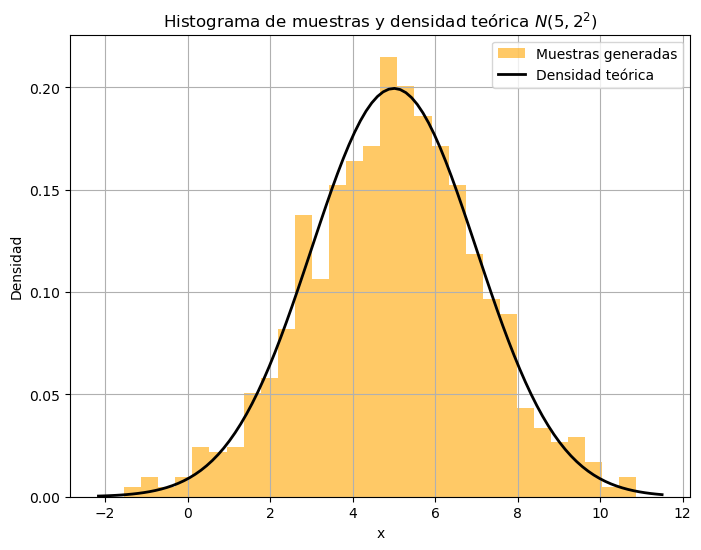

In [2]:
mu = 5  # Media
sigma = 2  # Desviación estándar

# Generar 1000 valores usando el método de Box-Muller
n = 1000
u1 = np.random.uniform(0, 1, n // 2)
u2 = np.random.uniform(0, 1, n // 2)

z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

# Transformar a N(mu, sigma^2)
x1 = mu + sigma * z1
x2 = mu + sigma * z2

# Combinar los valores generados
samples = np.concatenate([x1, x2])

# Crear el histograma
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=30, density=True, alpha=0.6, color="orange", label="Muestras generadas")

# plot a normal distribution curve for comparison with scipy
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label="Densidad teórica")
plt.title(f"Histograma de muestras y densidad teórica $N({mu}, {sigma}^2)$")
plt.xlabel("x")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

# Ejercicio 4

Considere la densidad
$$
h(x)=
\begin{cases}
1-\dfrac{x}{2}, & 0<x<2,\\[4pt]
0, & \text{en otro caso}.
\end{cases}
$$

## a) 
Determine analíticamente y muestre en el plano la región asociada $S\subset\mathbb{R}^2$. Compruebe que $|S|=\tfrac12$.  

$$
S=((u,v):\ 0<u<\sqrt{h(\tfrac v u)},\ \tfrac vu\in(0,2))
=(u>0,\ v>0:\ 0<u<\sqrt{1-\tfrac{1}{2}\tfrac vu}).
$$

**Elimine la raíz**

Como $u>0$,
$$
u<\sqrt{1-\tfrac{v}{2u}}
\iff u^{2}<1-\tfrac{v}{2u}.
$$

**Despeje en ((u,v))**

Multiplique por $2u>0$:
$$
2u^{3}+v<2u
\iff v<2u(1-u^{2}).
$$
Además, $v>0$ por $\tfrac vu\in(0,2)$. Para que exista $v>0$ con esa cota, el lado derecho debe ser positivo, lo que fuerza $u<1$.

**Región final**

$$
{S=((u,v):\ 0<u<1,\ \ 0<v<2u(1-u^{2})).}
$$

**Borde paramétrico equivalente**

Con $x:=v/u\in(0,2)$:
$$
u(x)=\sqrt{1-\tfrac{x}{2}},\qquad
v(x)=x,u(x)=x\sqrt{1-\tfrac{x}{2}},\qquad 0<x<2.
$$
El interior de (S) son los puntos por debajo de esa curva a lo largo de los radios $v=ux$.

**Chequeos útiles**

* Máximo vertical: $g(u)=2u(1-u^{2})$ se maximiza en $u=1/\sqrt{3}$, con
  $\displaystyle v_{\max}=g(1/\sqrt{3})=\frac{4}{3\sqrt{3}}$.
* Área: $|S|=\int_{0}^{2}!\int_{0}^{\sqrt{h(x)}}u,du,dx=\tfrac12\int_{0}^{2}(1-\tfrac{x}{2})dx=\tfrac12$. Consistente con CU.


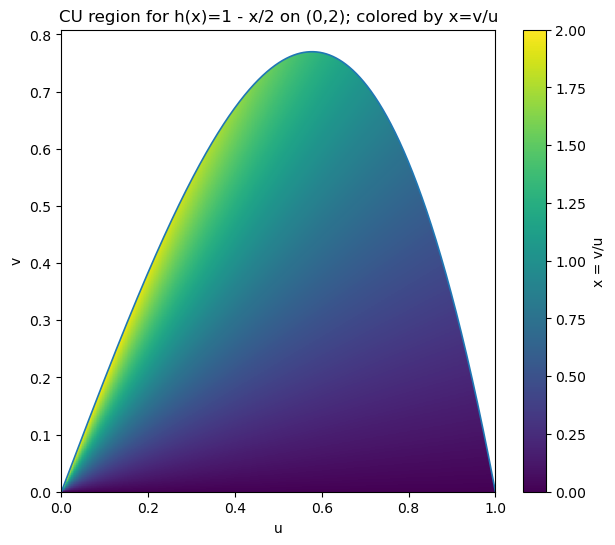

In [3]:
# Grid
nu, nv = 700, 700
eps = 1e-9
u_edges = np.linspace(eps, 1.0, nu+1)
v_max = 4/(3*np.sqrt(3))
v_edges = np.linspace(0.0, 1.05*v_max, nv+1)

u_cent = 0.5*(u_edges[:-1] + u_edges[1:])
v_cent = 0.5*(v_edges[:-1] + v_edges[1:])
U, V = np.meshgrid(u_cent, v_cent, indexing='xy')

boundary = 2*U*(1 - U**2)
region = (V > 0) & (V < boundary)
X = V / U
Z = np.where(region, X, np.nan)

fig, ax = plt.subplots(figsize=(7,6))
norm = colors.Normalize(vmin=0, vmax=2)
pcm = ax.pcolormesh(u_edges, v_edges, Z, shading='auto', cmap='viridis', norm=norm)

u_curve = np.linspace(eps, 1.0, 1200)
v_curve = 2*u_curve*(1 - u_curve**2)
ax.plot(u_curve, v_curve, linewidth=1.2)

ax.set_xlim(0, 1.0)
ax.set_ylim(0, 1.05*v_max)
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_title('CU region for h(x)=1 - x/2 on (0,2); colored by x=v/u')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label('x = v/u')

## b) 
Programe la generación de $500$ valores con densidad $h(x)$.  

In [4]:
def h(x):
    return 1 - x / 2


n_samples = 500
samples = []
while len(samples) < n_samples:
    x = np.random.uniform(0, 2)  # Proponer x en el intervalo [0, 2]
    y = np.random.uniform(0, 1)  # Proponer y en el intervalo [0, max(h(x)$ = 1]
    if y < h(x):  # Aceptar si (x, y) está debajo de h(x)
        samples.append(x)

samples = np.array(samples)

## c) 
Haga un histograma de frecuencias relativas y dibuje $h(x)$ en la misma gráfica.

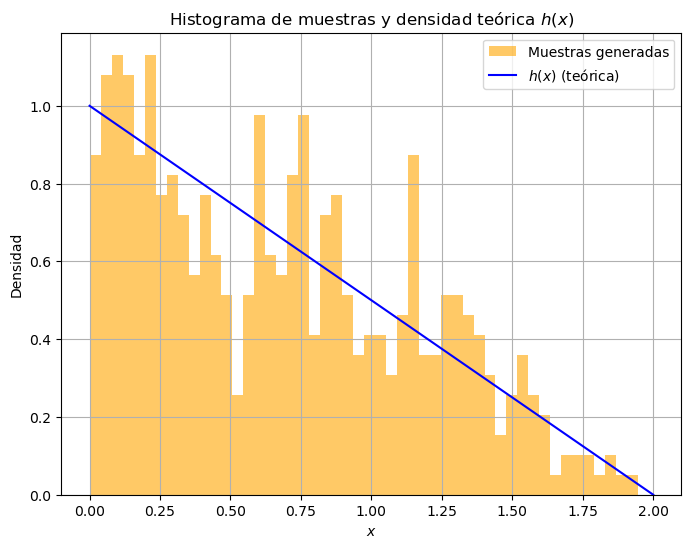

In [5]:
# Crear el histograma de frecuencias relativas
x_vals = np.linspace(0, 2, 500)
y_vals = h(x_vals)

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color="orange", label="Muestras generadas")
plt.plot(x_vals, y_vals, color="blue", label=r"$h(x)$ (teórica)")
plt.title("Histograma de muestras y densidad teórica $h(x)$")
plt.xlabel("$x$")
plt.ylabel("Densidad")
plt.legend()
plt.grid()
plt.show()

# Ejercicio 5

Aplique el cociente de uniformes para generar valores con densidad
$$
h(x)=\frac{1}{\pi(1+x^2)},\quad -\infty<x<\infty.
$$



## a) 

Determine y grafique la región $S\subset\mathbb{R}^2$. Verifique $|S|=\tfrac12$.  



Sea $h(x)=[\pi(1+x^2)]^{-1}$ y defina la región del cociente de uniformes
$$
S=\{(u,v):\ 0<u<\sqrt{h(v/u)}, \quad \frac{v}{u}\in\text{sop}(h)\}.
$$

$$
S=\{(u,v):\ 0<u<\sqrt{\frac{1}{\pi(1+(v/u)^2)}}, \quad \frac{v}{u}\in\mathbb R\}.
$$


$$
S=\{(u,v):\ 0<u<\sqrt{\frac{1}{\pi(1+(v/u)^2)}}, \quad {v}\in\mathbb R\}.
$$


Nos fijamos en 
$$
u<\sqrt{\frac{1}{\pi(1+(v/u)^2)}}
$$
Multiplicamos ambos lados por $\sqrt{1+(v/u)^2}>0$ y la desigualdad se mantiene:
$$
u\sqrt{1+(v/u)^2} < \frac{1}{\sqrt{\pi}}.
$$

Ambos lados son positivos, por lo que la función $t\mapsto t^2$ es estrictamente creciente y preserva la desigualdad:
$$
[u\sqrt{1+(v/u)^2}]^2<(\frac{1}{\sqrt{\pi}})^2.
$$
Desarrollando el cuadrado en el lado izquierdo:
$$
u^2(1+\frac{v^2}{u^2})=u^2+v^2.
$$
Así obtenemos
$$
u^2+v^2<\frac{1}{\pi}.
$$

Desde la definición de $S$ se exige $0<u$. Por tanto, la descripción final es
$$
S=\{(u,v):0<u^2+v^2<\frac{1}{\pi}\}.
$$

La desigualdad $u^2+v^2<1/\pi$ describe el disco abierto de radio $R=1/\sqrt{\pi}$ centrado en el origen. La condición $u>0$ restringe a la mitad derecha del disco. 


**El área del semidisco es**
$$
|S|=\tfrac{1}{2}\pi R^2=\tfrac{1}{2}\pi\frac{1}{\pi}=\tfrac{1}{2}.
$$

En coordenadas polares $(u,v)=(r\cos\theta, r\sin\theta)$:
$$
0<r<\frac{1}{\sqrt{\pi}},\qquad -\frac{\pi}{2}<\theta<\frac{\pi}{2}.
$$

$u=0$ queda excluido por definición del método y porque $v/u$ no está definido; el círculo $u^2+v^2=1/\pi$ tampoco pertenece a $S$ por la desigualdad estricta.

$$
S=\{(r\cos\theta,r\sin\theta):\ 0<r<\frac{1}{\sqrt{\pi}},\ -\frac{\pi}{2}<\theta<\frac{\pi}{2}\}.
$$


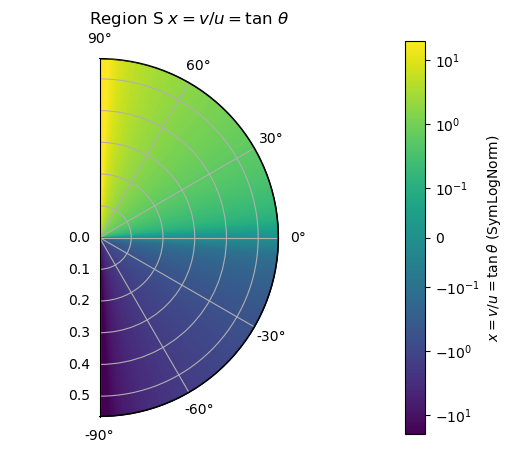

In [6]:
# Fix pcolormesh shape mismatch: use (n_r, n_theta) for X to match RE, ThetaE (which are (n_r+1, n_theta+1) edges).


R = 1/np.sqrt(np.pi)

n_theta, n_r = 720, 200
margin = 1e-3
theta_edges = np.linspace(-np.pi/2 + margin, np.pi/2 - margin, n_theta+1)
r_edges = np.linspace(0.0, R, n_r+1)

theta_centers = 0.5*(theta_edges[:-1] + theta_edges[1:])
r_centers = 0.5*(r_edges[:-1] + r_edges[1:])

ThetaE, RE = np.meshgrid(theta_edges, r_edges, indexing='xy')
ThetaC, RC = np.meshgrid(theta_centers, r_centers, indexing='xy')

# X must be shape (n_r, n_theta) to match cells
X = np.tan(ThetaC)   # shape (n_r, n_theta)

norm = colors.SymLogNorm(linthresh=0.1, linscale=0.7, vmin=-20, vmax=20)

fig = plt.figure(figsize=(6,6))
ax = plt.subplot(111, projection='polar')

pcm = ax.pcolormesh(ThetaE, RE, X, cmap='viridis', norm=norm, shading='auto')

ax.plot([theta_edges[0], theta_edges[0]], [0, R], linewidth=1.0, color='black')
ax.plot([theta_edges[-1], theta_edges[-1]], [0, R], linewidth=1.0, color='black')
ax.plot(np.linspace(theta_edges[0], theta_edges[-1], 800), R*np.ones(800), linewidth=1.5, color='black')

ax.set_thetamin(-90)
ax.set_thetamax(90)
ax.set_rlim(0, R)
ax.set_title('Region S $x=v/u=\\tan\\,\\theta$')
ax.grid(True)

cbar = fig.colorbar(pcm, ax=ax, shrink=0.85, pad=0.08)
cbar.set_label(r'$x=v/u=\tan\theta$ (SymLogNorm)')



## b) 

Genere $500$ valores.  

**Algoritmo (polares, sin rechazo)**

1. Genere $\Theta\sim\mathrm{Unif}(-\tfrac{\pi}{2},\tfrac{\pi}{2})$ y $W\sim\mathrm{Unif}(0,1)$ independientes.
2. Ponga $R=1/\sqrt{\pi}$ y $\rho=R\sqrt{W}$. Defina $U=\rho\cos\Theta$, $V=\rho\sin\Theta$.
3. Devuelva $X=V/U=\tan\Theta$ $\Rightarrow\ X\sim\mathrm{Cauchy}(0,1)$.


In [7]:
n = 500
R = 1/np.sqrt(np.pi)

theta = np.random.uniform(-np.pi/2, np.pi/2, size=n)   # ángulo ~ Unif(-π/2, π/2)
w = np.random.rand(n)                                  # radio al cuadrado
radio = R*np.sqrt(w)                                   # radio:  r = R*sqrt(w)

u = radio*np.cos(theta)
v = radio*np.sin(theta)
x = v/u                                                # all are accepted!!


## c)

Histograma de frecuencias relativas y $h(x)$ superpuesta.

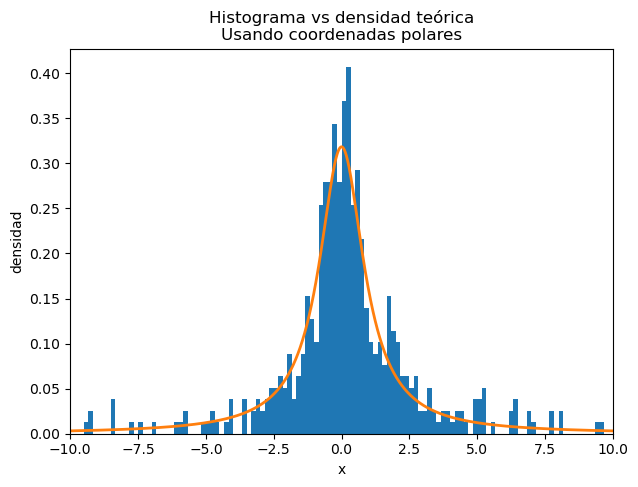

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(x, bins=120, density=True, range=(-10,10))
grid = np.linspace(-10, 10, 1200)
theory = 1/(np.pi*(1+grid**2))
ax.plot(grid, theory, linewidth=2.0)
ax.set_xlim(-10, 10)
ax.set_xlabel("x")
ax.set_ylabel("densidad")
ax.set_title("Histograma vs densidad teórica\nUsando coordenadas polares")
plt.grid(False)

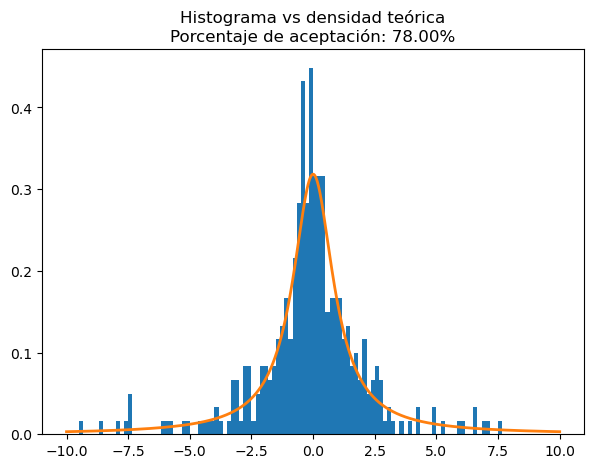

In [9]:
n = 500
u = np.random.uniform(0, 1/np.sqrt(np.pi), size=n)   # u ~ Unif(0, R)
v = np.random.uniform(-1/np.sqrt(np.pi), 1/np.sqrt(np.pi), size=n)   # v ~ Unif(-R, R)

accepted_x = []
for i in range(n):
    if u[i]**2 + v[i]**2 <= (1/np.sqrt(np.pi))**2:
        x = v[i]/u[i]
        accepted_x.append(x)
accepted_x = np.array(accepted_x)
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(accepted_x, bins=120, density=True, range=(-10,10))
porcentaje_aceptacion = len(accepted_x) / n * 100
ax.set_title(f"Histograma vs densidad teórica\nPorcentaje de aceptación: {porcentaje_aceptacion:.2f}%")
grid = np.linspace(-10, 10, 1200)
theory = 1/(np.pi*(1+grid**2))
ax.plot(grid, theory, linewidth=2.0)


# Ejercicio 6

Con $\lambda>0$,
$$
h(x)=\frac12\,\lambda e^{-\lambda|x|},\quad -\infty<x<\infty.
$$

## a)
Obtenga y grafique $S\subset\mathbb{R}^2$. Verifique $|S|=\tfrac12$.  

Sea $\lambda>0$ y

$$
h(x)=\frac{\lambda}{2}e^{-\lambda|x|},\qquad x\in\mathbb R.
$$
Defina la región 
$$
S=\{(u,v):\ 0<u<\sqrt{h(v/u)},\quad  \tfrac vu\in\mathbb R\}
$$
$$
S=\{(u,v):\ 0<u<\sqrt{\frac{\lambda}{2}e^{-\lambda|\frac{v}{u}|}},\quad  \tfrac vu\in\mathbb R\}
$$

$$
S=\{(u,v):\ 0<u<
\sqrt{\frac{\lambda}{2}}e^{-\frac{\lambda}{2}|\frac{v}{u}|}
,\quad  v\in\mathbb R\}
$$
Notemos que $u$ alcanza su máximo cuando lo exponencial es 1 (cuando $v=0$), entonces $u<\sqrt{\frac{\lambda}{2}}$.
Como $u>0$ tomamos logaritmos:
$$
\ln u< \ln(\sqrt{\frac{\lambda}{2}}e^{-\frac{\lambda}{2}\frac{|v|}{u}})
$$
$$
\ln u<\tfrac12\ln(\tfrac{\lambda}{2})-\frac{\lambda}{2}\frac{|v|}{u}
$$
Reordenando
$$
\frac{\lambda}{2}\frac{|v|}{u}<\tfrac12\ln(\tfrac{\lambda}{2})-\ln u
$$
$$
\frac{\lambda}{2}\frac{|v|}{u}<\ln(\frac{\sqrt{\lambda/2}}{u})
$$
Por tanto para cada $u$ admisible:
$$
|v|<\frac{2u}{\lambda}\ln(\frac{\sqrt{\lambda/2}}{u}),\qquad
0<u\le \sqrt{\lambda/2}.
$$
Conclusión:
$$
{
S=
\{
(u,v):\ 0<u\le \sqrt{\lambda/2},
\quad |v|<\frac{2u}{\lambda}\ln(\frac{\sqrt{\lambda/2}}{u}))
}
\}
$$




**Rectángulo contenedor óptimo**

Recordemos que para $v$:
$$
|v|<\frac{2u}{\lambda}\ln(\frac{\sqrt{\lambda/2}}{u})
$$
Sea 
$$
g(u)=\frac{2u}{\lambda}\ln(\frac{\sqrt{\lambda/2}}{u})
$$
La queremos maximizar, podemos quitar constantes, todas son positivas. Sea $a=\sqrt{\lambda/2}$
$$
g(u)=u\ln(\frac{a}{u})
$$
$$
g(u)=u\ln(a)-u\ln(u)
$$
$$
g'(u)=u'\ln(a)-u'\ln(u) -  u\ln'(u)
$$
$$
g'(u)= \ln(a) -\ln(u) -  u\tfrac 1u
$$
$$
g'(u)=\ln(a)-\ln(u) - 1
$$

Para maximizar

$$
g'(u)= 0
$$
$$
\ln(a)-\ln(u) - 1=0
$$
$$
u = e^{-1 + \ln(a)}
$$
$$
u^* = ae^{-1}
$$
Entonces $V$ alcanza su máximo en $g(u^*)$

$$

   v_{\max}=g(u^*)=\frac{2}{\lambda}u^*[\ln(a/u^*)]

   =\frac{2}{\lambda}u^*\cdot 1

   =\frac{2}{\lambda}\frac{\sqrt{\lambda/2}}{e}

   =\frac{1}{e}\sqrt{\frac{2}{\lambda}}.

$$

Entonces, un rectángulo contenedor es:

$$

(0,\sqrt{\lambda/2})\times(-\tfrac{1}{e}\sqrt{\tfrac{2}{\lambda}},\ \tfrac{1}{e}\sqrt{\tfrac{2}{\lambda}}),

$$

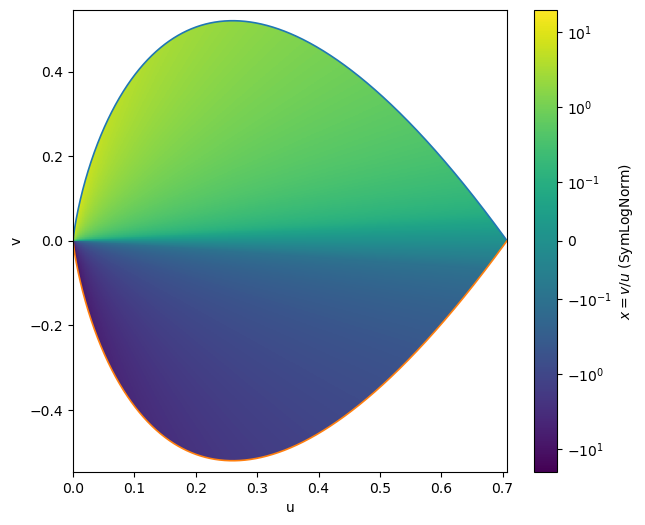

In [10]:
# Parameters
lambda_ = 1.0
nu, nv = 700, 700
eps = 1e-9

# Bounds
u_max = np.sqrt(lambda_ / 2.0)
v_max_global = (1 / np.e) * np.sqrt(2.0 / lambda_)  # maximum |v| over u
v_pad = 1.05 * v_max_global

# Grid edges for pcolormesh
u_edges = np.linspace(eps, u_max, nu + 1)  # avoid u=0
v_edges = np.linspace(-v_pad, v_pad, nv + 1)

# Cell centers
u_cent = 0.5 * (u_edges[:-1] + u_edges[1:])
v_cent = 0.5 * (v_edges[:-1] + v_edges[1:])
U, V = np.meshgrid(u_cent, v_cent, indexing="xy")

# Ratio and region mask
X = V / np.maximum(U, np.finfo(float).tiny)  # x = v/u
rhs = np.sqrt(lambda_ / 2.0) * np.exp(-(lambda_ / 2.0) * (np.abs(V) / np.maximum(U, np.finfo(float).tiny)))
region = (U > 0) & (U < rhs)

# Color only inside S
Z = np.where(region, X, np.nan)
fig, ax = plt.subplots(figsize=(7,6))
norm = colors.SymLogNorm(linthresh=0.1, linscale=0.7, vmin=-20, vmax=20)
pcm = ax.pcolormesh(u_edges, v_edges, Z, shading='auto', cmap='viridis', norm=norm)

# Boundary curves: v = ± (2u/λ) ln( sqrt(λ/2)/u ), 0<u<sqrt(λ/2)
u_curve = np.linspace(eps, u_max, 1200)
v_up = (2.0*u_curve/lambda_) * np.log(np.sqrt(lambda_/2.0)/u_curve)
v_lo = -v_up
ax.plot(u_curve, v_up, linewidth=1.2)
ax.plot(u_curve, v_lo, linewidth=1.2)

ax.set_xlim(0, u_max)
ax.set_ylim(-v_pad, v_pad)
ax.set_xlabel('u')
ax.set_ylabel('v')
cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(r'$x=v/u$ (SymLogNorm)')

El area del rectángulo contenedor es:

$$

(0,\sqrt{\lambda/2})\times(-\tfrac{1}{e}\sqrt{\tfrac{2}{\lambda}},\ \tfrac{1}{e}\sqrt{\tfrac{2}{\lambda}}),


   |R|=\sqrt{\lambda/2}\cdot 2\cdot \frac{1}{e}\sqrt{\frac{2}{\lambda}}=\frac{2}{e}.

$$

   Como $|S|=\tfrac12$,

$$

   \mathbb P(\text{aceptar})=\frac{|S|}{|R|}=\frac{1/2}{2/e}=\frac{e}{4}.

$$

## b) 

**Algoritmo (rechazo en rectángulo)**

1. Genere $U\sim\mathrm{Unif}(0,\sqrt{\lambda/2})$ y $V\sim\mathrm{Unif}(-\tfrac{1}{e}\sqrt{2/\lambda}\ , \tfrac{1}{e}\sqrt{2/\lambda})$ independientes.
2. Acepte si
$$
   U<\sqrt{\tfrac{\lambda}{2}}\ \exp(-\frac{\lambda}{2}\frac{|V|}{U})
   
$$
3. Devuelva $X=V/U$. 

Genere $500$ valores para un $\lambda$ elegido.  

In [11]:
def ex6(n: int, lam: float, batch: int = 500, seed: int | None = None):

    # Initialize random number generator
    rng = np.random.default_rng(seed)

    # Compute bounds for the quotient of uniforms method
    a = np.sqrt(lam / 2)                 # Upper bound for U
    b = (1 / np.e) * np.sqrt(2 / lam)    # Symmetric bound for V

    # Initialize variables for sampling
    need = n                             # Number of samples still needed
    xs = []                              # List to store accepted samples
    proposals = 0                        # Total number of proposals made
    accepted_total = 0                   # Total number of accepted samples

    # Rejection sampling loop
    while need > 0:
        m = max(batch, need)  # Generate at least `batch` proposals or the remaining needed samples
        U = rng.uniform(0.0, a, size=m)  # Propose U values in [0, a]
        V = rng.uniform(-b, b, size=m)   # Propose V values in [-b, b]
        U = np.maximum(U, np.finfo(float).tiny)  # Avoid division by zero by ensuring U > 0

        # Acceptance condition
        accept = U < a * np.exp(-(lam / 2) * (np.abs(V) / U))
        X = V[accept] / U[accept]  # Transform accepted (U, V) pairs to X values

        # Update counters and store accepted samples
        accepted_total += accept.sum()
        xs.append(X[:need])  # Only take as many as needed
        proposals += m
        need -= X[:need].size

    # Concatenate all accepted samples into a single array
    x = np.concatenate(xs)
    acc_rate = accepted_total / proposals  # Calculate acceptance rate
    return x, acc_rate


# Example usage
lam = 1.7  # Rate parameter for the Laplace distribution
n = 500    # Number of samples to generate
x, acc = ex6(n, lam, seed=123)


## c)

 Histograma de frecuencias relativas y $h(x)$ superpuesta.

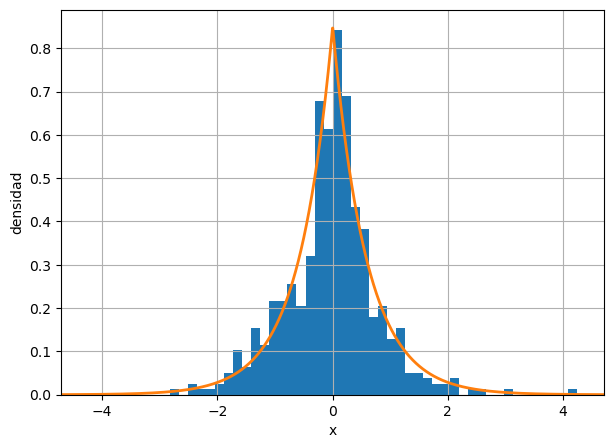

In [12]:
# Histograma vs densidad teórica
L = 8/lam  # Limit for x-axis (approximately 99.9% of the distribution, (it is a property of the Laplace distribution))
grid = np.linspace(-L, L, 2000)
theory = 0.5*lam*np.exp(-lam*np.abs(grid))

fig, ax = plt.subplots(figsize=(7,5))
ax.hist(x, bins=60, density=True, range=(-L, L))
ax.plot(grid, theory, linewidth=2.0)
ax.set_xlim(-L, L)
ax.set_xlabel("x")
ax.set_ylabel("densidad")
plt.grid()

# Ejercicio 7

La gamma $(\alpha,\lambda)$ tiene densidad
$$
f(x)=\frac{\lambda^{\alpha}}{\Gamma(\alpha)}x^{\alpha-1}e^{-\lambda x},\quad x>0.
$$

## a)
Muestre que si $X\sim\mathrm{Gamma}(\alpha,1)$, entonces $X/\lambda\sim\mathrm{Gamma}(\alpha,\lambda)$. Basta generar $\mathrm{Gamma}(\alpha,1)$, cuya densidad es
$$
f(x)=\frac{1}{\Gamma(\alpha)}x^{\alpha-1}e^{-x},\quad x>0.
$$
Escoja $\alpha>1$ (el caso $0<\alpha\le 1$ se obtiene a partir de $\alpha>1$).


Definición de la variable transformada:
$$
Y=\frac{X}{\lambda}\quad\Longleftrightarrow\quad X=\lambda Y,\qquad \lambda>0.
$$

**Cambio de variable**

Sea $x=\lambda y$. La transformación es monótona creciente en $(0,\infty)$, con inversa $y=x/\lambda$. El Jacobiano es
$$
\frac{dx}{dy}=\lambda\quad\Rightarrow\quad \left|\frac{dx}{dy}\right|=\lambda.
$$
La fórmula de transformación de densidades da, para $y>0$,
$$
\begin{aligned}
f_Y(y)
&= f_X(\lambda y)\left|\frac{dx}{dy}\right|
= \frac{1}{\Gamma(\alpha)}(\lambda y)^{\alpha-1}e^{-\lambda y}\cdot \lambda
= \frac{\lambda^{\alpha}}{\Gamma(\alpha)}y^{\alpha-1}e^{-\lambda y}.
\end{aligned}
$$
Que es la densidad $\mathrm{Gamma}(\alpha,\lambda)$ 
$$
Y\sim \mathrm{Gamma}(\alpha,\lambda).
$$

**con MGF** 

La MGF de $X\sim \mathrm{Gamma}(\alpha,1)$ es $M_X(t)=(1-t)^{-\alpha}$ para $t<1$.
Entonces
$$
M_Y(t)=\mathbb E\big[e^{tY}\big]=\mathbb E\big[e^{tX/\lambda}\big]=M_X(\frac{t}{\lambda})=(1-\frac{t}{\lambda})^{-\alpha},
$$
que es la MGF de $\mathrm{Gamma}(\alpha,\lambda)$.


**Conclusión**

Para simular $Z\sim \mathrm{Gamma}(\alpha,\lambda)$:

1. Genere $X\sim \mathrm{Gamma}(\alpha,1)$ por su método preferido.

2. Devuelva $Z=X/\lambda$.


## b) 
Considere $h(x)=x^{\alpha-1}e^{-x}$ para $x>0$ y derive la expresión analítica de la región $S$ para su $\alpha$.


Para $h(x)=x^{\alpha-1}e^{-x}\mathbf 1_{(0,\infty)}$ la región es

$$

S={(u,v):,0<u<\sqrt{h(v/u)},\ v/u>0}={u>0,v>0:\ u^2<(v/u)^{\alpha-1}e^{-v/u}}.

$$


Partimos de

$$

u^2<(\tfrac{v}{u})^{\alpha-1}e^{-v/u},\qquad u>0,\ v>0.

$$

### Caso $\alpha=1$

$$

u^2<e^{-v/u}\

$$
Como $u, v > 0$, $- \tfrac vu < 0$. La exponencial llega a su máximo cuando la fracción se acerca a cero. entonces:
$$0<u<1$$
Y resolviendo para $v$:
$$
0 < v<-2u\ln u,\qquad 0<u<1.

$$

Conclusión:

$$
S=
\{
(u,v):
0<u<1, \qquad
0<v<-2u\ln u
\}
$$
### Caso $\alpha > 1$  $(k:=\alpha-1>0)$
  

$$
u^2<(\tfrac{v}{u})^{k}e^{-v/u},\qquad u>0,\ v>0.
$$


Eleve a la potencia $(1/k)$: 


$$
u^{2/k}<(\tfrac{v}{u})e^{-v/ku},\qquad u>0,\ v>0.
$$

Sea $x:=v/u>0$. Entonces

$$
u^{2/k}<xe^{-x/k},\qquad u>0,\ x>0.
$$

Multiplicamos por $- \tfrac 1k$


$$
-\tfrac 1k u^{2/k}
>
-\tfrac xke^{-x/k},\qquad u>0,\ x>0.
$$

Por Lambert (W):


$$
W_j(-\tfrac 1k u^{2/k})
>
-\tfrac xk,\qquad u>0,\ x>0.
$$
$$
-kW_j(-\tfrac 1k u^{2/k})
<
x,\qquad u>0,\ x>0.
$$



$W$ es la inversa (multivaluada) de $w\mapsto we^{w}$, $W_0$ se conoce como la rama principal y $W_{-1}$ como la rama inferior. Para $y\in\mathbb R$:

* Si $y>0$: hay **una** solución real $W_0(y)>0$.
* Si $y=0$: $W_0(0)=0$.
* Si $-1/e<y<0$: hay **dos** soluciones reales, la rama principal es creciente y la inferior decreciente.
$$
  W_0(y)\in(-1,0)\quad\text{y}\quad W_{-1}(y)\in(-\infty,-1).
$$
* Si $y=-1/e$: hay **una** solución real doble $W_0(-1/e)=W_{-1}(-1/e)=-1$.
* Si $y<-1/e$: **no** hay soluciones reales.

Se llaman así por la estructura multivaluada de la inversa de $w\mapsto w e^{w}$.

* **Rama principal $W_{0}$**: es la solución real que pasa por $W_{0}(0)=0$, es analítica alrededor de (0), y es **creciente** en su dominio real $[{-}1/e,\infty$). Para $y\in(-1/e,0)$ cumple $-1<W_{0}(y)<0$.

* **Rama inferior $W_{-1}$**: es la **otra** solución real definida solo en $([{-}1/e,0))$. Es **decreciente** y toma valores ($-\infty,-1]$. Para el mismo $y\in(-1/e,0)$ siempre vale $W_{-1}(y);<;W_{0}(y)$.

“Inferior” tiene sentido porque, para todo (y) donde coexisten, **sus valores son menores**: $W_{-1}(y)$ está por “debajo” de $W_{0}(y)$ en el eje real. “Principal” se reserva para la rama que contiene el punto (0) y coincide con la expansión estándar $W_{0}(y)=y-y^{2}+\tfrac{3}{2}y^{3}-\cdots$ cerca de $y=0$.


Para tener soluciones **reales**, el argumento
$y(u):=-\dfrac{u^{2/k}}{k}$ debe pertenecer a $([{-}1/e,0))$.

* El valor $y=-1/e$ ocurre cuando **se toca el máximo** de $u(x)$.
* En $(-1/e,0)$ existen **dos ramas reales**: $W_0(y)\in(-1,0)$ y $W_{-1}(y)\in-(\infty,-1]$.

Si $y(u)\in(-1/e,0)$ hay **dos** soluciones:
$$
{
x_{-}(u)=-k,W_{0}(-\frac{u^{2/k}}{k}),\quad
x_{+}(u)=-k,W_{-1}(-\frac{u^{2/k}}{k})
}
$$
y si $y(u)=-1/e$ hay una solución doble $x=k$.




**Hallar $u$**

Desde $u^2=x^{k}e^{-x}$ obtenemos
$$
u(x)=x^{k/2}e^{-x/2},\qquad x>0.
$$

Maximice $\ell(x):=\ln u(x)=\tfrac{k}{2}\ln x-\tfrac{x}{2}$:

$$  
\ell(x):=\ln u(x)=\tfrac{k}{2}\ln x-\tfrac{x}{2}.  
$$
$$  
\ell'(x)=\tfrac{k}{2}\cdot \tfrac{1}{x}-\tfrac{1}{2}  
=\frac{k}{2x}-\frac{1}{2}.  
$$

Igualamos la primera derivada a cero:
$$
\ell'(x)=0\ 
$$
$$
\frac{k}{2}\frac{1}{x}-\frac{1}{2}=0\ 
$$
$$
x^{*}=k.
$$

$\ell''(x)=-\tfrac{k}{2x^2}<0\Rightarrow$ máximo. Así,
$$
u_{\max}=u(x^{*})=k^{k/2}e^{-k/2}=(\tfrac{k}{e})^{k/2}
=(\tfrac{\alpha-1}{e})^{(\alpha-1)/2}.
$$

* Si $0<u<u_{\max}\Rightarrow y(u)\in(-1/e,0)$ $\Rightarrow$ **dos** soluciones $x_{-}(u)<k<x_{+}(u)$.
* El borde en $v$ es $v=ux_{\pm}(u)$.
  Por tanto:
$$
  {u\in(0,u_{\max}),\qquad ux_{-}(u)<v<ux_{+}(u);}.
$$
  En $u=u_{\max}$ se colapsa a un solo punto $x=k$, y para $u>u_{\max}$ no hay soluciones reales.

**La región es**
$$
S= \{ (u,v):\ 0<u<u_{\max},\ ux_{-}(u)<v<ux_{+}(u)\ \}.
$$

donde
$$
{\ x_{-}(u)=-kW_{0}(-\frac{u^{2/k}}{k}),\qquad
x_{+}(u)=-kW_{-1}(-\frac{u^{2/k}}{k})\ , } \quad(0<u<u_{\max}),
$$
y
$$
u_{\max}=(\tfrac{k}{e})^{k/2}=(\tfrac{\alpha-1}{e})^{(\alpha-1)/2}.
$$

Notas: $x_{-}(u)<\alpha-1<x_{+}(u)$ y $x_{-}=x_{+}=\alpha-1$ cuando $u=u_{\max}$.



### $0<\alpha<1$ con $k:=\alpha-1<0$

$$
u^2<(\tfrac{v}{u})^{k}e^{-v/u},\qquad u>0,\ v>0,\ k<0.
$$
Elevar a potencia $1/k<0$ invierte la desigualdad:
$$
u^{2/k}>(\tfrac{v}{u})e^{-\frac{v}{ku}},\qquad u>0,\ v>0.
$$
Sustituir $x:=v/u>0$
$$
u^{2/k}>xe^{-x/k},\qquad u>0,\ x>0.
$$

Para el **borde** use igualdad $u^{2/k}=xe^{-x/k}$. Defina $z:=-x/k$ y $y:=-u^{2/k}/k$. Entonces
$$
ze^{z}=y,\qquad z=-\frac{x}{k},\quad y=-\frac{u^{2/k}}{k}.
$$
Como $k<0\Rightarrow -1/k>0$ y $u^{2/k}=u^{-2/|k|}>0$, se cumple $y>0$. Por tanto hay **una** solución real:
$$
z=W_0(y)=W_0(-\tfrac{u^{2/k}}{k}),\quad{x_{+}(u)=-kW_0(-\tfrac{u^{2/k}}{k})}>0.
$$


Sentido de la desigualdad en (x)
$$
\phi(x):=xe^{-x/k},\qquad \phi'(x)=e^{-x/k}(1-\tfrac{x}{k})>0\ \ (k<0).
$$
$\phi$ es **estrictamente creciente** en $x>0$. Luego
$$
u^{2/k}>\phi(x)\ \Longleftrightarrow\ x< x_{+}(u).
$$

Como $\lim_{x\downarrow0}x^{k}e^{-x}=+\infty$ para $k<0$, no hay cota superior en (u). La proyección sobre (u) es $(0,\infty)$. Para cada $u>0$,
$$
0<x< x_{+}(u)\quad\Longleftrightarrow\quad 0<v<u,x_{+}(u).
$$
Región final $(0<\alpha<1)$

$$
S=(u,v):\ u>0,\ \ 0<v<ux_{+}(u)$$
$$
x_{+}(u)=-k,W_0(-\tfrac{u^{2/k}}{k})= (1-\alpha)W_0(\tfrac{u^{-2/(1-\alpha)}}{1-\alpha}).

$$

## c) 
Grafique la región $S$ (gráfica de función implícita).


In [13]:
def region_mask(alpha, u_max, v_max, nu=700, nv=700, eps=1e-12):
    u_vals = np.linspace(eps, u_max, nu)         # u>0
    v_vals = np.linspace(0.0, v_max, nv)         # v>0
    U, V = np.meshgrid(u_vals, v_vals)
    X = V / U                                    # x = v/u
    
    if abs(alpha - 1.0) < 1e-12:
        region = (U**2) < np.exp(-X)
    else:
        # x^{α-1} with x→0 handling
        pow_term = np.where(X > 0, X**(alpha - 1.0), np.inf)
        region = (U**2) < (pow_term * np.exp(-X))
    return U, V, X, region

def gamma_bounds(alpha):
    v_max = ((alpha + 1.0)/np.e)**((alpha + 1.0)/2.0)
    if alpha > 1.0:
        u_max = ((alpha - 1.0)/np.e)**((alpha - 1.0)/2.0)
    elif abs(alpha - 1.0) < 1e-12:
        u_max = 1.0
    else:
        u_max = None
    return u_max, v_max

def envelope_uv(alpha, x_lo=1e-4, x_hi=None, n=1800):
    if x_hi is None:
        x_hi = max(10.0, 6.0*(alpha+1.0))
    x = np.linspace(x_lo, x_hi, n)
    u = x**((alpha-1.0)/2.0) * np.exp(-x/2.0)
    v = x * u
    return u, v

C:\Users\herie\AppData\Local\Temp\ipykernel_26124\1035861341.py:11: RuntimeWarning: divide by zero encountered in power
  pow_term = np.where(X > 0, X**(alpha - 1.0), np.inf)


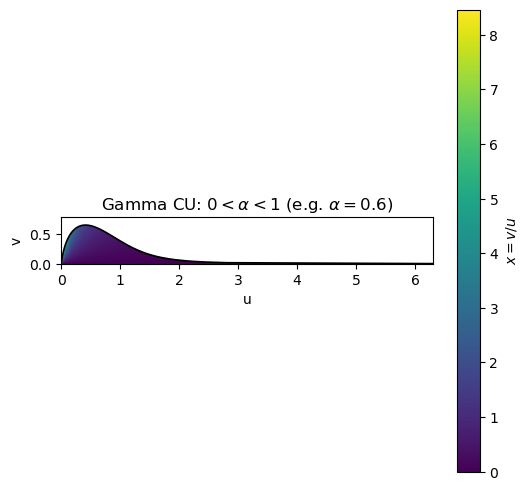

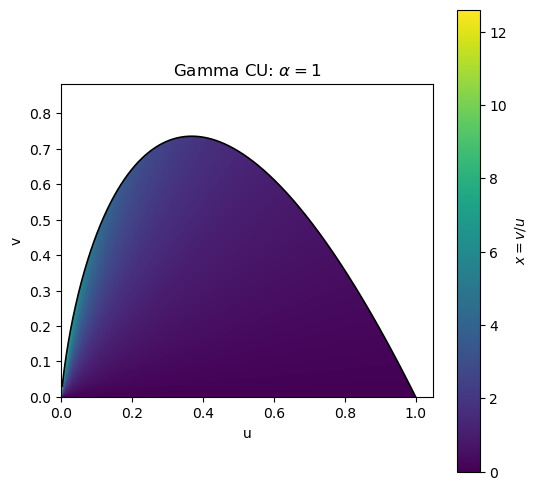

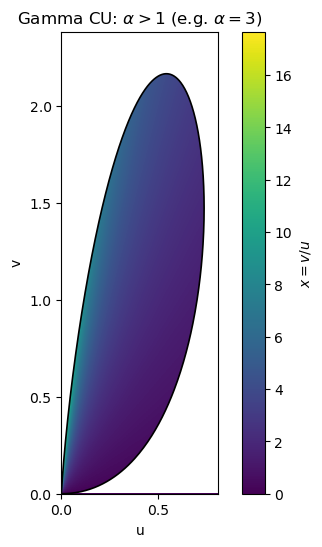

In [14]:
cases = [
    {"alpha": 0.6, "title": r"Gamma CU: $0<\alpha<1$ (e.g. $\alpha=0.6$)"},
    {"alpha": 1.0, "title": r"Gamma CU: $\alpha=1$"},
    {"alpha": 3.0, "title": r"Gamma CU: $\alpha>1$ (e.g. $\alpha=3$)"},
]

outputs = []
for case in cases:
    alpha = case["alpha"]
    title = case["title"]
    u_max_th, v_max_th = gamma_bounds(alpha)
    if alpha > 1.0:
        u_max_plot = 1.1 * u_max_th
        v_max_plot = 1.1 * v_max_th
    elif abs(alpha - 1.0) < 1e-12:
        u_max_plot = 1.05 * u_max_th
        v_max_plot = 1.2 * v_max_th
    else:
        x_min = 1e-4
        u_cap = x_min**((alpha-1.0)/2.0) * np.exp(-x_min/2.0)
        u_max_plot = float(min(u_cap, 30.0))
        v_max_plot = 1.2 * v_max_th
    
    U, V, X, region = region_mask(alpha, u_max_plot, v_max_plot, nu=700, nv=700)
    Z = np.where(region, X, np.nan)  # color by x=v/u inside S; outside S -> NaN (blank)
    
    fig, ax = plt.subplots(figsize=(6,6))
    # Colored field
    pcm = ax.pcolormesh(U, V, Z, shading='auto', cmap='viridis')
    # Boundary
    ub, vb = envelope_uv(alpha)
    m = (ub > 0) & (ub <= u_max_plot) & (vb >= 0) & (vb <= v_max_plot)
    ax.plot(ub[m], vb[m], color="black", linewidth=1.2)
    
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(0, u_max_plot)
    ax.set_ylim(0, v_max_plot)
    ax.set_xlabel('u')
    ax.set_ylabel('v')
    ax.set_title(title)
    cbar = fig.colorbar(pcm, ax=ax)
    cbar.set_label(r'$x=v/u$')


##  d) 
Demuestre analíticamente o por integración Monte Carlo (aceptación–rechazo)
$$
|S|=\frac12\int_{-\infty}^{\infty}h(x)\,dx=\frac12\,\Gamma(\alpha).
$$

Defina la región asociada (subgráfico escalado):
$$
S = \{(x, y) \in \mathbb{R}^2 : 0 < y < \tfrac{1}{2} h(x)\}.
$$
Entonces,
$$
|S| = \iint_S 1 \, dA = \int_{-\infty}^\infty \left( \int_0^{\tfrac{1}{2} h(x)} dy \right) dx
= \frac{1}{2} \int_{-\infty}^\infty h(x) \, dx.
$$
Para $h(x) = x^{\alpha-1} e^{-x} \mathbf{1}_{(0, \infty)}(x)$,
$$
\int_{-\infty}^\infty h(x) \, dx = \int_0^\infty x^{\alpha-1} e^{-x} \, dx = \Gamma(\alpha).
$$
Conclusión:
$$
|S| = \frac{1}{2} \Gamma(\alpha).
$$


## e)
Genere $500$ valores de $\mathrm{Gamma}(\alpha,1)$ usando el cociente de uniformes. Haga un histograma de probabilidad y superponga la densidad teórica.

**Case A — ( \alpha>1 )**
```
input: n, α>1
k ← α − 1
u_max ← (k/e)^(k/2)
v_max ← ((α+1)/e)^((α+1)/2)
S ← ∅
while |S| < n:
    draw U ~ Unif(0, u_max)
    draw V ~ Unif(0, v_max)
    x ← V / U                          # ratio
    if U^2 < x^k * exp(-x):            # point (U,V) ∈ Sα
        append x to S
return S
```

**Case B — ( \alpha=1 )**

```
input: n, α=1
u_max ← 1
v_max ← 2/e
S ← ∅
while |S| < n:
    draw U ~ Unif(0, u_max)
    draw V ~ Unif(0, v_max)
    x ← V / U
    if U^2 < exp(-x):
        append x to S
return S
```

**Case C — ( 0<\alpha<1 )**

```
input: n, 0<α<1
u_max ← 1                                  # safe vertical cap
v_max ← (2α)^α * exp(-α)                   # horizontal cap from v(t) maximum
S ← ∅
while |S| < n:
    draw U ~ Unif(0, u_max)
    draw V ~ Unif(0, v_max)
    t ← V / U
    if U < exp( -0.5 * t^(1/α) ):          # (U,V) ∈ region for q(t)
        x ← t^(1/α)                        # back-transform: X = T^(1/α)
        append x to S
return S
```

Text(0.5, 1.0, 'Gamma(α=2.30, 1) por Cociente de Uniformes; aceptación ≈ 0.6867')

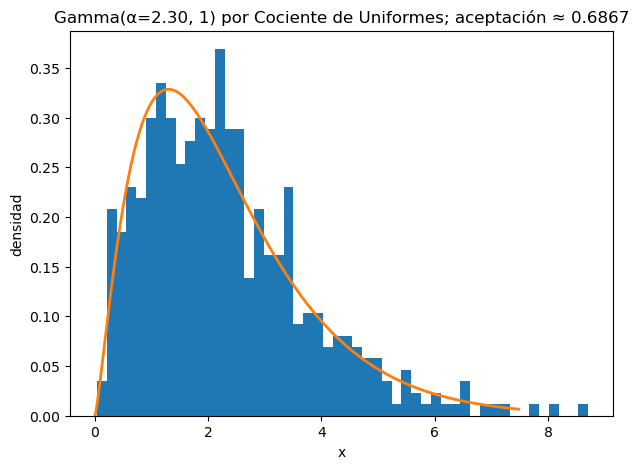

In [15]:
def gamma_cu(n: int, alpha: float, seed: int | None = None, batch: int = 50_000):
    assert alpha > 0.0, "α debe ser > 0"
    rng = np.random.default_rng(seed)
    xs = []
    need = n
    proposals = 0
    accepted = 0
    
    if alpha > 1.0:
        k = alpha - 1.0
        u_max = (k / e) ** (k / 2.0)
        v_max = ((alpha + 1.0) / e) ** ((alpha + 1.0) / 2.0)
        while need > 0:
            m = max(batch, need)
            U = rng.uniform(0.0, u_max, size=m)
            V = rng.uniform(0.0, v_max, size=m)
            U = np.maximum(U, np.finfo(float).tiny)
            Xratio = V / U
            accept = (U**2) < (Xratio**k) * np.exp(-Xratio)
            X = Xratio[accept]
            accepted += accept.sum()
            proposals += m
            take = min(need, X.size)
            xs.append(X[:take])
            need -= take
    
    elif abs(alpha - 1.0) < 1e-12:
        u_max = 1.0
        v_max = 2.0 / e
        while need > 0:
            m = max(batch, need)
            U = rng.uniform(0.0, u_max, size=m)
            V = rng.uniform(0.0, v_max, size=m)
            U = np.maximum(U, np.finfo(float).tiny)
            Xratio = V / U
            accept = (U**2) < np.exp(-Xratio)
            X = Xratio[accept]
            accepted += accept.sum()
            proposals += m
            take = min(need, X.size)
            xs.append(X[:take])
            need -= take
    
    else:
        # 0<alpha<1: TRU con φ(t)=t^{1/α}. Primero muestreamos T con región q(t)∝exp(-t^{1/α}), luego X=T^{1/α}.
        a = alpha
        # Región: 0 < u < exp(-0.5 * (v/u)^{1/a}), 0 < v < v_max(a) = e^{-a} (2a)^a
        u_max = 1.0
        v_max = (2.0 * a) ** a * e ** (-a)
        while need > 0:
            m = max(batch, need)
            U = rng.uniform(0.0, u_max, size=m)
            V = rng.uniform(0.0, v_max, size=m)
            U = np.maximum(U, np.finfo(float).tiny)
            Tratio = V / U
            accept = U < np.exp(-0.5 * (Tratio ** (1.0 / a)))
            T = Tratio[accept]
            X = T ** (1.0 / a)
            accepted += accept.sum()
            proposals += m
            take = min(need, X.size)
            xs.append(X[:take])
            need -= take
    
    x = np.concatenate(xs) if xs else np.array([])
    acc_rate = accepted / proposals if proposals > 0 else np.nan
    return x, acc_rate

# Parámetros y simulación
alpha = 2.3   # Cambia aquí si quieres otro α
n = 500
x, acc = gamma_cu(n, alpha=alpha, seed=123)

# Histograma de probabilidad + densidad teórica Gamma(α,1)
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(x, bins=50, density=True)
grid = np.linspace(0, max(1e-9, np.percentile(x, 99.5)), 1000)
theory = (grid**(alpha-1)) * np.exp(-grid) / gamma(alpha)  # λ=1
ax.plot(grid, theory, linewidth=2.0)
ax.set_xlabel("x")
ax.set_ylabel("densidad")
ax.set_title(f"Gamma(α={alpha:.2f}, 1) por Cociente de Uniformes; aceptación ≈ {acc:.4f}")

# Ejercicio 8

Genere $200$ pares $(x,y)$ con
$$
f(x,y)=
\begin{cases}
\dfrac{1}{\pi}, & x^2+y^2<1,\\[4pt]
0, & \text{en otro caso}.
\end{cases}
$$
Dibuje el círculo unitario y marque los puntos generados.

In [16]:
lowestcolorviridis = plt.cm.viridis(0)
largestcolorviridis = plt.cm.viridis(90000)

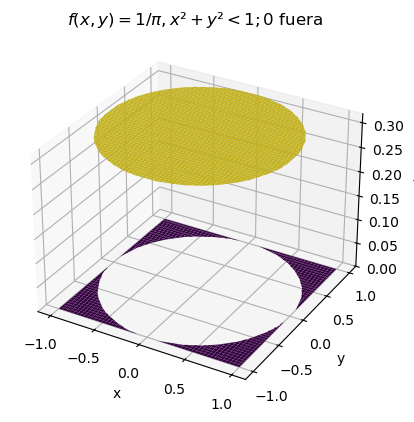

In [17]:
n = 200
x = np.linspace(-1, 1, n)
y = np.linspace(-1, 1, n)
X, Y = np.meshgrid(x, y, indexing="xy")

mask = X**2 + Y**2 < 1
Z = np.where(mask, 1/np.pi, np.nan)
zeros = np.where(~mask, 0.0, np.nan)

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, alpha=1, color=largestcolorviridis)
ax.plot_surface(X, Y, zeros, linewidth=0, antialiased=True, alpha=1, color=lowestcolorviridis)
ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel("f")
ax.set_zlim(0, 1/np.pi)
ax.set_title(r"$f(x,y)=1/π, x²+y²<1; 0$ fuera")
plt.show()


# Ejercicio 9

Grafique y dé detalles para generar valores con:





## a)
$$
f(x,y)=
\begin{cases}
6x^2y,& 0<x<1,\ 0<y<1,\\
0,& \text{en otro caso}.
\end{cases}
$$

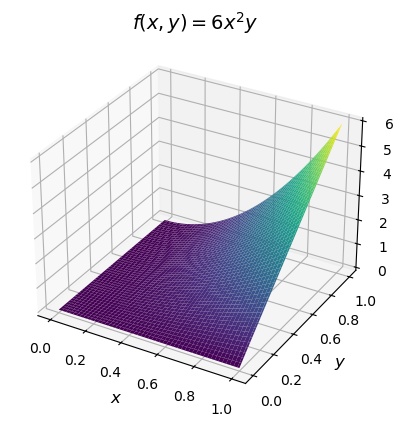

In [18]:
x = np.linspace(0, 1, 100)
y = np.linspace(0, 1, 100)
X, Y = np.meshgrid(x, y)

Z = 6 * X**2 * Y

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', linewidth=0, alpha=1)
ax.set_title(r"$f(x, y) = 6x^2y$", fontsize=14)
ax.set_xlabel("$x$", fontsize=12)
ax.set_ylabel("$y$", fontsize=12)
ax.set_zlabel("$f(x, y)$", fontsize=12)

plt.show()

## b)
$$
f(x,y)=
\begin{cases}
3x,& 0<y<x<1,\\
0,& \text{en otro caso}.
\end{cases}
$$


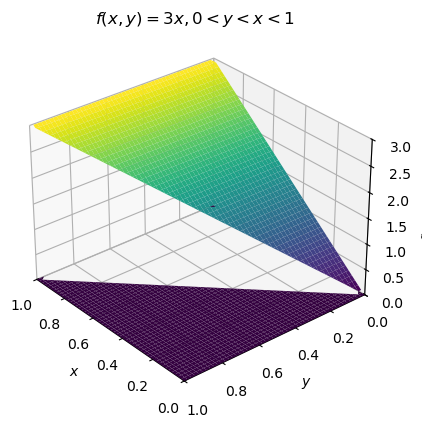

In [19]:
n = 400
x = np.linspace(0.0, 1.0, n)
y = np.linspace(0.0, 1.0, n)
X, Y = np.meshgrid(x, y, indexing="xy")

support = (Y > 0.0) & (X > Y) & (X < 1.0)

Z = np.where(support, 3.0 * X, np.nan)
zero = np.where(~support, 0.0, np.nan)


fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(X, Y, Z, linewidth=0, antialiased=True, cmap='viridis', alpha=1)
ax.plot_surface(X, Y, zero, linewidth=0, antialiased=True, color=lowestcolorviridis, alpha=1)
ax.set_xlabel("$x$"); ax.set_ylabel("$y$"); ax.set_zlabel("$f(x,y)$")
ax.set_title(r"$f(x,y)=3x, 0<y<x<1$")
ax.set_xlim(0,1); ax.set_ylim(0,1); ax.set_zlim(0,3)

ax.view_init(elev=30, azim=140)
plt.show()


# Ejercicio 10

Sea $(X_1,\dots,X_n)$ con densidad o masa $f(x_1,\dots,x_n)$. Demuestre
$$
f(x_1,\dots,x_n)=f(x_1)\,f(x_2\mid x_1)\cdots f(x_n\mid x_{n-1},\dots,x_1).
$$
Esto sugiere generar secuencialmente: primero $x_1\sim f(x_1)$, luego $x_2\sim f(x_2\mid x_1)$, etcétera, siempre que se conozca cómo muestrear de las condicionales.



**Caso $n=2$.** 

$$
f(x_1,x_2)=f(x_1)f(x_2\mid x_1).
$$
**Inducción.** 

Suponga cierto para $n-1$,
$$
f(x_{1}, \dots, x_{n-1})=f(x_1)f(x_2\mid x_1)\cdots f(x_{n-1}\mid x_{1}, \dots, x_{n-2}).
$$

Por definición de condicional, cuando $f(x_1,\dots,x_{n-1})>0$,
$$
f(x_1,\dots,x_n)=f(x_1,\dots,x_{n-1})f(x_n\mid x_1,\dots,x_{n-1}).
$$
Sustituyendo la hipótesis inductiva,
$$
\begin{aligned}
f(x_1,\dots,x_n)
&=\big[f(x_1)f(x_2\mid x_1)\cdots f(x_{n-1}\mid x_1,\dots,x_{n-2})\big]
f(x_n\mid x_1,\dots,x_{n-1})\\
&=f(x_1)f(x_2\mid x_1)\cdots f(x_n\mid x_1,\dots,x_{n-1}).
\end{aligned}
$$


# Ejercicio 11

Para $j=5,6,\dots,14$,
$$
p_j=
\begin{cases}
0.11,& j\ \text{impar y }5\le j\le 13,\\
0.09,& j\ \text{par y }6\le j\le 14.
\end{cases}
$$
Dé un algoritmo de simulación usando composición.

Algoritmo por **composición**.

**Descomposición en mezclas**  
Conjunto de estados: \{5,6,7,8,9,10,11,12,13,14\}.

Bloques:
* Bloque impar $I=\{5,7,9,11,13\}$ con pesos iguales (0.11) cada uno.
  Peso del bloque: $w_I=5\times 0.11=0.55$.
* Bloque par $P=\{6,8,10,12,14\}$ con pesos iguales (0.09) cada uno.
  Peso del bloque: $w_P=5\times 0.09=0.45$.

Condicionales dentro de cada bloque son **uniformes**:
$\mathbb P(J=j\mid j\in I)=1/5$, $\mathbb P(J=j\mid j\in P)=1/5$.

**Generación**  
1. Genere $U_1\sim\mathrm{Unif}(0,1)$.

   * Si $U_1<0.55$, elija el bloque **impar** (I); en otro caso el bloque **par** (P).

2. Genere $U_2\sim\mathrm{Unif}(0,1)$. Defina el índice
$$
   k=1+\big\lfloor 5,U_2\big\rfloor\in{1,2,3,4,5}
   \quad(\text{si }U_2=1,\ \text{fije }k=5).
$$
3. Si se eligió (I): devuelva
$$
   J=2k+3\in{5,7,9,11,13}.
$$
   Si se eligió (P): devuelva
$$
   J=2k+4\in{6,8,10,12,14}.
$$

**Corrección**  
Para (j) impar,
$$
\mathbb P(J=j)=\underbrace{0.55}*{\text{elige }I}\times \underbrace{\tfrac15}*{k\text{ uniforme}}=0.11.
$$
Para (j) par,
$$
\mathbb P(J=j)=\underbrace{0.45}*{\text{elige }P}\times \underbrace{\tfrac15}*{k\text{ uniforme}}=0.09.
$$
Coincide con $p_j$.

**Implementación**  
* Bloque: $B=\mathbf 1{U_1\ge 0.55}$ $(B=0\Rightarrow I,\ B=1\Rightarrow P)$.
* Índice: $k=1+\lfloor 5U_2\rfloor$.
* Salida:
$$
  J=\begin{cases}
  2k+3,& B=0,\
  2k+4,& B=1.
  \end{cases}
$$

In [20]:
def sample_X(n=1, rng=np.random.default_rng()):
    """
    Genera muestras de X con:
      p_j = 0.11 si j impar en {5,7,9,11,13}
      p_j = 0.09 si j par   en {6,8,10,12,14}
    Método: composición (mezcla de dos bloques).
    """
    U1 = rng.random(n)           # para elegir bloque
    U2 = rng.random(n)           # para elegir índice dentro del bloque
    k  = np.minimum((5*U2).astype(int) + 1, 5)   # k ∈ {1,...,5}

    # Bloque: 0 = impar (peso 0.55), 1 = par (peso 0.45)
    B = (U1 >= 0.55).astype(int)

    # Mapeo dentro de cada bloque
    J_impar = 2*k + 3            # {5,7,9,11,13}
    J_par   = 2*k + 4            # {6,8,10,12,14}

    return np.where(B == 0, J_impar, J_par)

m = 100_000
js = sample_X(m)
vals, counts = np.unique(js, return_counts=True)
freqs = counts / m

# prob. esperada por j
expected = np.array([0.11 if j % 2 else 0.09 for j in vals])
error = freqs - expected

df = pd.DataFrame({
    "j": vals,
    "conteo": counts,
    "frecuencia": np.round(freqs, 5),
    "p_esperada": np.round(expected, 5),
    "error": np.round(error, 5)
})

df = df.sort_values("j", ignore_index=True)
print(df.to_string(index=False))


 j  conteo  frecuencia  p_esperada    error
 5   11022     0.11022        0.11  0.00022
 6    8975     0.08975        0.09 -0.00025
 7   10996     0.10996        0.11 -0.00004
 8    8929     0.08929        0.09 -0.00071
 9   10958     0.10958        0.11 -0.00042
10    9029     0.09029        0.09  0.00029
11   10969     0.10969        0.11 -0.00031
12    9120     0.09120        0.09  0.00120
13   10913     0.10913        0.11 -0.00087
14    9089     0.09089        0.09  0.00089


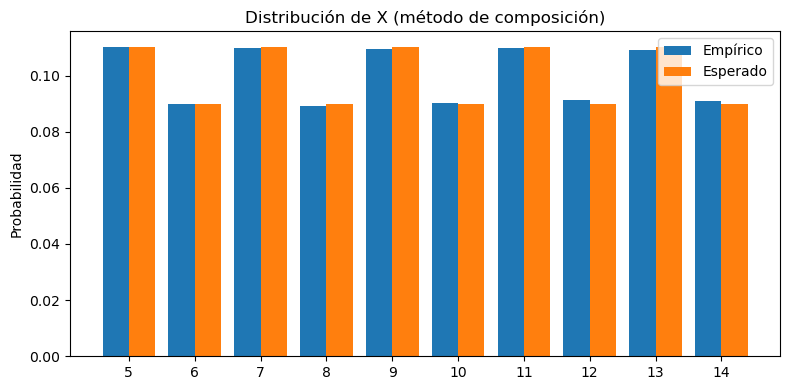

In [21]:
# ancho y posiciones
x = np.arange(len(vals))
w = 0.4

plt.figure(figsize=(8,4))
plt.bar(x - w/2, freqs, width=w, label="Empírico")     # no fijar colores
plt.bar(x + w/2, expected, width=w, label="Esperado")
plt.xticks(x, vals)
plt.ylabel("Probabilidad")
plt.title("Distribución de X (método de composición)")
plt.legend()
plt.tight_layout()
plt.show()


# Ejercicio 12

Si es fácil generar de $F_i$, $i=1,\dots,n$, ¿cómo generar una v.a. con
$$
F(x)=\sum_{i=1}^n p_i\,F_i(x),
$$
donde $p_i\ge 0$ y $\sum_i p_i=1$? Describa el método de composición.


Construya un **índice** aleatorio $I\in{1,\dots,n}$ con $\mathbb P(I=i)=p_i$ y, **condicionalmente en $I=i$**, genere $X\sim F_i$.
Por la ley de la probabilidad total:
$$
\mathbb P(X\le x)=\sum_{i=1}^{n}\mathbb P(X\le x\mid I=i),\mathbb P(I=i)=\sum_{i=1}^{n}F_i(x),p_i=F(x).
$$


**Algoritmo paso a paso**

**Entrada:** pesos $(p_1,\dots,p_n)$ y generadores de componentes $\texttt{Gen}_i$ que devuelven $X_i\sim F_i$.

**Preprocesamiento:**

1. Calcule las acumuladas $c_0:=0$, $c_k:=\sum_{i=1}^{k}p_i$ para $k=1,\dots,n$
   $con (c_n=1)$.

**Generación de una muestra (X):**

2. Genere $U\sim\mathrm{Unif}(0,1)$.

3. Determine el índice
$$
   I=\min{k:\ U\le c_k}\quad\text{equiv. } U\in(c_{I-1},c_I].
$$
   (Búsqueda secuencial (O(n)$ o binaria (O(\log n)$ sobre ({c_k}).)

4. Genere, **independientemente** de (U), una muestra $X\leftarrow \texttt{Gen}_I()$ de la componente $F_I$.

5. **Salida:** (X).

**Pseudocódigo**  

```text
# Pre: p[1..n] con sum p[i] = 1; CDF inversas o generadores Gen_i disponibles
c[0] <- 0
for k in 1..n:
    c[k] <- c[k-1] + p[k]

function SampleMixture():
    U <- Uniform(0,1)
    # localizar índice I tal que c[I-1] < U <= c[I]
    I <- 1 + max{ k in {0,...,n-1} : c[k] < U }   # o búsqueda binaria
    X <- Gen_I()   # generar de F_I
    return X
```

Si cada $F_i$ admite inversa $F_i^{-1}$, entonces `Gen_i()` puede ser simplemente `F_i^{-1}(V)` con $V\sim\mathrm{Unif}(0,1)$.


In [22]:
# ===========================
# MÉTODO DE COMPOSICIÓN
# X ~ sum_{i=1}^n p_i F_i  (mezcla)
# ===========================

def sample_mixture(p, samplers, n=1, rng=None):
    """
    Genera n muestras de la mezcla F(x) = sum_i p_i F_i(x).
    - p: lista/array de pesos p_i >= 0 (se normalizan por seguridad).
    - samplers: lista de generadores; el i-ésimo acepta 'size' y produce ~ F_i.
    - rng: numpy.random.Generator opcional.

    Devuelve:
      X : (n,) muestras de la mezcla
      I : (n,) índice de componente elegido (0..k-1) para cada muestra
    """
    if rng is None:
        rng = np.random.default_rng()

    # -------------------------------
    # PREPROCESAMIENTO (acumuladas):
    # Paso 1) c_0 := 0; c_k := sum_{i=1}^k p_i, con c_n = 1
    # -------------------------------
    p = np.asarray(p, dtype=float)
    p = p / p.sum()                 # normaliza defensivamente (por si acaso)
    c = np.cumsum(p)                # c_k (sin c_0, que sería 0)

    # ---------------------------------------
    # GENERACIÓN DE UNA MUESTRA (vectorizada)
    # ---------------------------------------

    # Paso 2) Genere U ~ Unif(0,1).
    U = rng.random(n)

    # Paso 3) Determine el índice I = min{k : U <= c_k}  (equiv. U ∈ (c_{I-1}, c_I])
    # (Búsqueda binaria O(log n) en {c_k} con searchsorted.)
    I = np.searchsorted(c, U)       # I ∈ {0,1,...,n-1} con P(I=i)=p_i

    # Paso 4) Genere, independientemente de U, una muestra X ~ F_I (condicional a I).
    X = np.empty(n, dtype=float)
    for i in range(len(p)):
        idx = (I == i)
        m = idx.sum()
        if m:
            X[idx] = samplers[i](size=m, rng=rng)

    # Paso 5) Salida: X
    return X, I


# ---------------------------------------------------------
# Generadores de componentes de ejemplo (para probar)
# ---------------------------------------------------------
def normal01_box_muller(size=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    u1 = rng.random(size)
    u2 = rng.random(size)
    z = np.sqrt(-2.0 * np.log(u1)) * np.cos(2.0 * np.pi * u2)
    return z

def exponential_lam(lam=2.0):
    def gen(size=1, rng=None):
        if rng is None:
            rng = np.random.default_rng()
        u = rng.random(size)
        return -np.log(1.0 - u) / lam     # inversa de Exp(lam)
    return gen

def uniform_ab(a=-2.0, b=2.0):
    def gen(size=1, rng=None):
        if rng is None:
            rng = np.random.default_rng()
        return a + (b - a) * rng.random(size)
    return gen


# ===========================
# Mezcla: 0.3·N(0,1) + 0.5·Exp(2) + 0.2·Unif(-2,2)
# ===========================
if __name__ == "__main__":
    rng = np.random.default_rng(12345)

    p = [0.30, 0.50, 0.20]
    samplers = [
        normal01_box_muller,
        exponential_lam(2.0),
        uniform_ab(-2.0, 2.0)
    ]

    m = 100_000
    xs, comps = sample_mixture(p, samplers, n=m, rng=rng)

    # Chequeo rápido de frecuencias por componente (deberían acercarse a p):
    vals, counts = np.unique(comps, return_counts=True)
    emp = counts / m
    for i, (v, c) in enumerate(zip(vals, counts)):
        print(f"comp {i}: emp={emp[i]:.4f}, p={p[i]:.4f}, error={emp[i]-p[i]:.4f}")


comp 0: emp=0.3021, p=0.3000, error=0.0021
comp 1: emp=0.4958, p=0.5000, error=-0.0042
comp 2: emp=0.2021, p=0.2000, error=0.0021


# Ejercicio 13

Dé algoritmos para generar variables.

 ## a)
$$
F(x)=\frac{x+x^3+x^5}{3},\quad 0\le x\le 1.
$$


Observación : en (0,1), $x^m$ es la CDF de $\mathrm{Beta}(m,1)$. Por tanto
$$
F(x)=\tfrac13,x+\tfrac13,x^{3}+\tfrac13,x^{5}
$$
es una **mezcla equiprobable** de $\mathrm{Beta}(1,1)$, $\mathrm{Beta}(3,1)$ y $\mathrm{Beta}(5,1)$.


1. Genere $U_0\sim\mathrm{Unif}(0,1)$.

   * Si $U_0<\tfrac13$, elija el componente $m=1$.
   * Si $\tfrac13\le U_0<\tfrac23$, elija $m=3$.
   * Si $\tfrac23\le U_0\le 1$, elija $m=5$.

2. Genere $U\sim\mathrm{Unif}(0,1)$ independiente.

3. Devuelva
$$
   X=U^{1/m}.
$$

Para $m\in{1,3,5}$, $X\mid m \sim \mathrm{Beta}(m,1)$ con $\mathbb P(X\le x\mid m)=x^m$. Mezclando equiprobablemente:
$$
\mathbb P(X\le x)=\tfrac13(x+x^{3}+x^{5})=F(x).
$$

In [23]:
# =========================
# 13(a)
# =========================

# --- teóricas  ---
def F_13a(x):
    x = np.asarray(x)
    return (x + x**3 + x**5) / 3.0

def f_13a(x):
    x = np.asarray(x)
    out = (1.0 + 3.0*x**2 + 5.0*x**4) / 3.0
    return np.where((0 <= x) & (x <= 1), out, 0.0)

# --- generador  ---
def sample_13a_via_11(n=1, rng=None):
    """
    Paso 1 (11): U0 ~ Unif(0,1) y elegir componente m∈{1,3,5} por umbrales:
                 [0,1/3) -> m=1; [1/3,2/3) -> m=3; [2/3,1] -> m=5.
    Paso 2 (11): U ~ Unif(0,1) independiente y X = U^(1/m) (CDF x^m).
    """
    if rng is None:
        rng = np.random.default_rng()

    # Paso 1 (selección de bloque)
    U0 = rng.random(n)
    m = np.empty(n, dtype=int)
    m[U0 < 1/3] = 1
    m[(U0 >= 1/3) & (U0 < 2/3)] = 3
    m[U0 >= 2/3] = 5

    # Paso 2 (generación condicional dentro del bloque)
    U = rng.random(n)           # independiente de U0
    X = U ** (1.0 / m)

    return X, m  # (m te permite verificar 1/3,1/3,1/3)


In [24]:
# verificación ----------
if __name__ == "__main__":
    rng = np.random.default_rng(12345)
    n = 100_000
    x, m = sample_13a_via_11(n, rng=rng)

    # Chequeo de frecuencias de cada componente (≈ 1/3)
    vals, counts = np.unique(m, return_counts=True)
    freqs = counts / n
    for val, fr in zip(vals, freqs):
        print(f"m={val}: frecuencia empírica = {fr:.4f} (esperada 0.3333)")

m=1: frecuencia empírica = 0.3342 (esperada 0.3333)
m=3: frecuencia empírica = 0.3320 (esperada 0.3333)
m=5: frecuencia empírica = 0.3338 (esperada 0.3333)



## b)
$$
F(x)=
\begin{cases}
\dfrac{1-e^{-2x}+2x}{3},& 0<x<1,\\[6pt]
\dfrac{3-e^{-2x}}{3},& 1<x<\infty.
\end{cases}
$$


Descomposición:
$$
F(x)={\tfrac{2}{3}F_{\text{Unif}(0,1)}(x)}
\ +
{\tfrac{1}{3}F_{\text{Exp}(2)}(x)}
$$

donde $F_{\text{Unif}(0,1)}(x)=\min(x,1)$ y $F*{\text{Exp}(2)}(x)=(1-e^{-2x})\mathbf 1_{[0,\infty)}(x)$ es la CDF de $\mathrm{Exp}(2)$, válida para todo $x\in\mathbb{R}$, pero que vale $0$ para $x<0$ y $1-e^{-2x}$ para $x\ge 0$. Por tanto, la mezcla es una CDF


1. Genere $B\sim\mathrm{Bernoulli}(p=2/3)$.

2. Si $B=1$ (bloque uniforme):

   * Genere $U\sim\mathrm{Unif}(0,1)$.
   * Devuelva $X=U$.

3. Si $B=0$ (bloque exponencial):

   * Genere $U\sim\mathrm{Unif}(0,1)$.
   * Devuelva $X=-(1/2),\ln U$ $(\text{equivalente a }-(1/2)\ln(1-U)$$.


$\mathbb P(X\le x)=\tfrac23,\min{x,1}+\tfrac13(1-e^{-2x})$, que coincide con la pieza $0<x<1$ y con $1-e^{-2x}/3$ para $x>1$.

In [25]:
# =========================
# 13(b)
# =========================
# --- CDF y PDF  ---
def F_13b(x):
    x = np.asarray(x)
    Fx = np.zeros_like(x, dtype=float)
    mask1 = (x > 0) & (x < 1)
    mask2 = (x >= 1)
    Fx[mask1] = (1.0 - np.exp(-2.0*x[mask1]) + 2.0*x[mask1]) / 3.0
    Fx[mask2] = (3.0 - np.exp(-2.0*x[mask2])) / 3.0
    return Fx

def f_13b(x):
    x = np.asarray(x)
    fx = np.zeros_like(x, dtype=float)
    mask1 = (x > 0) & (x < 1)
    mask2 = (x >= 1)

    fx[mask1] = (2.0*np.exp(-2.0*x[mask1]) + 2.0) / 3.0
    fx[mask2] = (2.0*np.exp(-2.0*x[mask2])) / 3.0
    return fx

# --- Generador  ---
def sample_13b_via_11(n=1, rng=None):
    """
    Paso 1 (11): U0 ~ Unif(0,1) y define B = 1{U0 < 2/3}.
                 (B=1: bloque Uniforme; B=0: bloque Exponencial)
    Paso 2 (11): si B=1 -> X = U  con U ~ Unif(0,1) independiente;
                 si B=0 -> X = -(1/2) ln(1-U) con U ~ Unif(0,1) (inversa de Exp(2)).
    """
    if rng is None:
        rng = np.random.default_rng()

    # ---- Paso 1 (selección de bloque) ----
    U0 = rng.random(n)          # Unif(0,1)
    B = (U0 < 2/3).astype(int)  # Bernoulli(2/3): 1 = uniforme, 0 = exponencial

    # ---- Paso 2 (generación condicional) ----
    U = rng.random(n)           # independiente de U0
    X = np.empty(n, dtype=float)
    # Bloque uniforme:
    mask_uni = (B == 1)
    X[mask_uni] = U[mask_uni]                   # X ~ Unif(0,1)
    # Bloque exponencial (λ=2):
    mask_exp = ~mask_uni
    X[mask_exp] = -0.5 * np.log(1.0 - U[mask_exp])  # inversa: Exp(2)

    return X, B  # devolvemos también el bloque para verificar frecuencias


In [26]:
#  verificación
if __name__ == "__main__":
    rng = np.random.default_rng(2025)
    n = 100_000
    x, B = sample_13b_via_11(n=n, rng=rng)

    # Frecuencias de bloques (debe ≈ 2/3 para uniforme y ≈ 1/3 para exponencial)
    p_uni = (B == 1).mean()
    p_exp = (B == 0).mean()
    print(f"Bloque uniforme: emp={p_uni:.4f}  (esperada 0.6667)")
    print(f"Bloque exponencial: emp={p_exp:.4f} (esperada 0.3333)")


Bloque uniforme: emp=0.6696  (esperada 0.6667)
Bloque exponencial: emp=0.3304 (esperada 0.3333)



## c)
$$
F(x)=\sum_{i=1}^n \alpha_i x^i,\quad 0\le x\le 1,\quad \alpha_i\ge 0,\ \sum_{i=1}^n \alpha_i=1.
$$

De nuevo, $x^{i}$ es la CDF de $\mathrm{Beta}(i,1)$. Por tanto (F) es una **mezcla discreta** de $\mathrm{Beta}(i,1)$ con pesos $\alpha_i$.



1. Genere $I\in{1,\dots,n}$ con
$$
   \mathbb P(I=i)=\alpha_i\quad (i=1,\dots,n).
$$
   (Use un único (U_0\sim\mathrm{Unif}(0,1)$ y umbrales acumulados (\sum_{k\le i}\alpha_k).)

2. Genere $U\sim\mathrm{Unif}(0,1)$ independiente.

3. Devuelva
$$
   X=U^{1/I}.
$$



Condicional en $I=i$, $X\sim\mathrm{Beta}(i,1)$, así $\mathbb P(X\le x\mid I=i)=x^{i}$. Por mezcla:
$$
\mathbb P(X\le x)=\sum_{i=1}^{n}\alpha_i x^{i}=F(x).
$$

In [27]:
# =========================
# 13(c)
# =========================
def sample_13c(alpha, n=1, rng=None):
    """
    Genera X con F(x) = sum_i alpha[i] * x^{i+1} en [0,1].
    alpha: array de pesos (alpha_i >= 0, suma 1).  NOTE: alpha[0] corresponde a i=1.
    n: número de muestras
    """
    if rng is None:
        rng = np.random.default_rng()

    # Paso 1: elegir componente I con P(I=i)=alpha_i
    alpha = np.asarray(alpha, dtype=float)
    alpha = alpha / alpha.sum()
    c = np.cumsum(alpha)
    U0 = rng.random(n)
    I_idx = np.searchsorted(c, U0)            # índices 0..n-1
    I = I_idx + 1                              # convertir a {1,2,...} (i)

    # Paso 2: generar condicionalmente X = U^{1/I}
    U = rng.random(n)                          # independiente de U0
    X = U ** (1.0 / I)

    return X, I


In [28]:
# --- ejemplo  ---
if __name__ == "__main__":
    rng = np.random.default_rng(123)
    alphas = [0.10, 0.20, 0.25, 0.25, 0.20]  # sum = 1; i=1..5
    x, I = sample_13c(alphas, n=100_000, rng=rng)

    # chequeo de frecuencias de componentes (≈ alphas)
    vals, counts = np.unique(I, return_counts=True)
    emp = counts / len(x)
    for i, p in zip(vals, emp):
        print(f"i={i}: emp={p:.4f}, alfa={alphas[i-1]:.4f}, error={p - alphas[i-1]:.4f}")


i=1: emp=0.0998, alfa=0.1000, error=-0.0002
i=2: emp=0.1998, alfa=0.2000, error=-0.0002
i=3: emp=0.2502, alfa=0.2500, error=0.0002
i=4: emp=0.2514, alfa=0.2500, error=0.0014
i=5: emp=0.1988, alfa=0.2000, error=-0.0012


# Ejercicio 14

Dé un método para generar una v.a. con
$$
F(x)=\int_0^{\infty} x^{y}e^{-y}\,dy,\quad 0\le x\le 1.
$$
Sugerencia: Sea $Y$ con densidad $e^{-y}\mathbf{1}_{\{y>0\}}$ y condicional de $X\mid Y=y$:
$$
\mathbb{P}\{X\le x\mid Y=y\}=x^{y},\quad 0\le x\le 1.
$$

Objetivo: generar (X) con
$$
F(x)=\int_{0}^{\infty}x^{y}e^{-y},dy,\qquad 0\le x\le 1.
$$

**1) Identidad clave y verificación de que (F) es CDF**

Para (x\in(0,1]), $\ln x\le 0$ y
$$
F(x)=\int_{0}^{\infty}e^{y\ln x}e^{-y},dy=\int_{0}^{\infty}e^{-(1-\ln x)y},dy=\frac{1}{1-\ln x}.
$$
Límites: $F(0)=0$ y $F(1)=1$. Derivando,
$$
f(x)=F'(x)=\frac{1}{x,(1-\ln x)^{2}},\qquad 0<x<1,
$$
con $\int_{0}^{1}f(x),dx=1$.

### 2) Método por composición condicional

**Paso 2.1. Construcción probabilística**

Sea $Y\sim\mathrm{Exp}(1)$ con densidad $e^{-y}\mathbf 1_{{y>0}}$. Condicionalmente a $Y=y>0$, defina $X\mid Y=y$ con CDF
$$
\mathbb P(X\le x\mid Y=y)=x^{y},\qquad 0\le x\le 1,
$$
lo cual equivale a $X\mid Y=y\sim \mathrm{Beta}(y,1)$ (parámetro de forma continuo). Su inversa es
$$
X=;U^{1/y}\quad\text{si}\quad U\sim\mathrm{Unif}(0,1).
$$

**Paso 2.2. Algoritmo**

1. Genere $U_1\sim\mathrm{Unif}(0,1)$ y ponga $Y=-\ln U_1$ $(\mathrm{Exp}(1)$$.

2. Genere $U_2\sim\mathrm{Unif}(0,1)$ independiente.

3. Devuelva
$$
   X=U_2^{,1/Y}=\exp!(\tfrac{\ln U_2}{Y}).
$$
   (Implementar como (X=\exp$(\ln U_2)/Y)$ mejora la estabilidad numérica cuando (Y) es pequeño.)

**Paso 2.3. Corrección**

Para $x\in[0,1]$,
$$
\mathbb P(X\le x)=\mathbb E\big[\mathbb P(X\le x\mid Y)\big]
=\mathbb E\big[x^{Y}\big]=\int_{0}^{\infty}x^{y}e^{-y},dy=F(x).
$$


**Método alternativo por transformada inversa directa**

De $F(x)=\frac{1}{1-\ln x}$ en $(0,1]), resuelva $U=F(x)$ con $U\sim\mathrm{Unif}(0,1)$:
$$
U=\frac{1}{1-\ln x}\quad\Longrightarrow\quad \ln x=1-\frac{1}{U}
\quad\Longrightarrow\quad
X=\exp!(1-\frac{1}{U}).
$$

**Algoritmo inversa**

1. Genere $U\sim\mathrm{Unif}(0,1)$.

2. Devuelva $X=\exp(1-1/U)$.

Nota numérica: si (U) es muy pequeño, (1/U) es grande y (X) se aproxima a 0; esta fórmula usa una sola uniforme y una exponencial.


**Chequeo estructural vía transformación logarítmica**

Si $T=-\ln X$, entonces $F_T(t)=\mathbb P(T\le t)=1-1/(1+t)$ y
$$
f_T(t)=\frac{1}{(1+t)^{2}},\qquad t\ge 0,
$$
es decir, $T\sim$ Lomax/Pareto II con forma 1 y escala 1. Otra implementación es:

1. Genere $E_1,E_2\stackrel{\text{iid}}{\sim}\mathrm{Exp}(1)$.

2. Ponga $T=E_1/E_2$ y $X=e^{-T}$.
   Esto es equivalente a los métodos anteriores.


In [29]:
# ======================================================
# Ejercicio 14 — Método por COMPOSICIÓN
# F(x) = ∫_0^∞ x^y e^{-y} dy,  0 <= x <= 1
# Construcción:
#   Y ~ Exp(1),  y>0
#   P{X <= x | Y=y} = x^y   (equiv. X|Y=y ~ Beta(y,1))
# Algoritmo:
#   1) Genere U1 ~ Unif(0,1) y ponga Y = -ln(U1)  (=> Exp(1))
#   2) Genere U2 ~ Unif(0,1) independiente
#   3) Devuelva X = U2^(1/Y)  (mejor como X = exp( ln(U2) / Y ))
# ======================================================

# --- funciones teóricas (las mismas del bloque anterior) ---
def F_theory(x):
    x = np.asarray(x)
    out = np.zeros_like(x, dtype=float)
    mask = (x > 0) & (x <= 1)
    out[mask] = 1.0 / (1.0 - np.log(x[mask]))
    out[x > 1] = 1.0
    return out

def Finv_theory(u):
    # inversa de F:  u = 1/(1 - ln x)  =>  x = exp(1 - 1/u)
    u = np.asarray(u, dtype=float)
    return np.exp(1.0 - 1.0/u)


In [31]:
# (1) Distancia KS (empírica vs. teórica)
xs = np.sort(x)
n  = len(xs)
ecdf = np.arange(1, n+1) / n
D = np.max(np.abs(ecdf - F_theory(xs)))
print(f"[KS] Distancia KS empírica = {D:.6f}")

# (2) Cuantiles: empírico vs. teórico
probs = np.array([0.10, 0.25, 0.50, 0.75, 0.90, 0.99])
q_emp = np.quantile(x, probs)
q_th  = Finv_theory(probs)
q_err = q_emp - q_th

USE_PD = True
if USE_PD:
    df_q = pd.DataFrame({
        "p": probs,
        "q_teorico": np.round(q_th, 6),
        "q_empirico": np.round(q_emp, 6),
        "error": np.round(q_err, 6)
    })
    print("\n[Cuantiles] Comparación empírico vs. teórico")
    print(df_q.to_string(index=False))
else:
    print("\n[Cuantiles] p | q_teorico | q_empirico | error")
    for p, a, b, e in zip(probs, q_th, q_emp, q_err):
        print(f"{p:>5.2f} | {a:>9.6f} | {b:>10.6f} | {e:+.6f}")

# (3) Tabla por bins: prob. empírica vs. teórica
#     Particiona [0,1] en B bins, compara masa por bin con F.
B = 20
edges = np.linspace(0, 1, B+1)
# prob teórica por bin = F(b_i) - F(a_i)
p_th = F_theory(edges[1:]) - F_theory(edges[:-1])
# prob empírica por bin
counts, _ = np.histogram(x, bins=edges)
p_emp = counts / n
p_err = p_emp - p_th

if USE_PD:
    df_bins = pd.DataFrame({
        "bin": [f"[{edges[i]:.2f},{edges[i+1]:.2f})" for i in range(B)],
        "p_teorica": np.round(p_th, 6),
        "p_empirica": np.round(p_emp, 6),
        "error": np.round(p_err, 6)
    })
    print("\n[Bins] Probabilidades por intervalo")
    print(df_bins.to_string(index=False))
else:
    print("\n[Bins] intervalo | p_teorica | p_empirica | error")
    for i in range(B):
        print(f"[{edges[i]:.2f},{edges[i+1]:.2f}) | {p_th[i]:.6f} | {p_emp[i]:.6f} | {p_err[i]:+.6f}")

# (4) (opcional) estadísticas básicas
print("\n[Stats] media_emp = {:.6f}, var_emp = {:.6f}".format(x.mean(), x.var()))


[KS] Distancia KS empírica = 0.439774

[Cuantiles] Comparación empírico vs. teórico
   p  q_teorico  q_empirico    error
0.10   0.000123    0.409534 0.409411
0.25   0.049787    0.618297 0.568510
0.50   0.367879    0.798933 0.431053
0.75   0.716531    0.913891 0.197360
0.90   0.894839    0.968329 0.073490
0.99   0.989950    0.996955 0.007005

[Bins] Probabilidades por intervalo
        bin  p_teorica  p_empirica     error
[0.00,0.05)   0.250267     0.00557 -0.244697
[0.05,0.10)   0.052526     0.00643 -0.046096
[0.10,0.15)   0.042377     0.00825 -0.034127
[0.15,0.20)   0.038054     0.00976 -0.028294
[0.20,0.25)   0.035835     0.01197 -0.023865
[0.25,0.30)   0.034666     0.01438 -0.020286
[0.30,0.35)   0.034121     0.01739 -0.016731
[0.35,0.40)   0.033994     0.02157 -0.012424
[0.40,0.45)   0.034175     0.02516 -0.009015
[0.45,0.50)   0.034600     0.03043 -0.004170
[0.50,0.55)   0.035230     0.03797  0.002740
[0.55,0.60)   0.036044     0.04392  0.007876
[0.60,0.65)   0.037028     0.05187 

# Ejercicio 15

Muestre cómo generar una v.a. con
$$
F(x)=\frac12(x+x^2),\quad 0\le x\le 1,
$$
usando el método de composición.


En ([0,1]):

* $F_1(x)=x$ es la CDF de $\mathrm{Unif}(0,1)$.
* $F_2(x)=x^2$ es la CDF de $\mathrm{Beta}(2,1)$ porque si $V\sim\mathrm{Unif}(0,1)$, entonces $V^{1/2}$ cumple $\mathbb P(V^{1/2}\le x)=\mathbb P(V\le x^2)=x^2$.

Por tanto,
$$
F(x)=\tfrac12 F_1(x)+\tfrac12 F_2(x)
$$
es una **mezcla** equiprobable de $\mathrm{Unif}(0,1)$ y $\mathrm{Beta}(2,1)$.


**Algoritmo con dos uniformes independientes**

Paso 1. Genere $U_0\sim\mathrm{Unif}(0,1)$.

Paso 2. Seleccione el componente:

* Si $U_0<\tfrac12$, elija el componente 1 (uniforme).
* Si $U_0\ge \tfrac12$, elija el componente 2 (beta).

Paso 3. Genere $U\sim\mathrm{Unif}(0,1)$ independiente.

Paso 4. Devuelva
$$
X=\begin{cases}
U, & \text{si se eligió el componente 1},[4pt]
U^{1/2}, & \text{si se eligió el componente 2}.
\end{cases}
$$


In [32]:
#   Ej. 15
def sample_ex15_composicion(n=1, rng=None):
    if rng is None:
        rng = np.random.default_rng()
    U0 = rng.random(n)                 # PASO 1
    is_uniform = (U0 < 0.5)            # PASO 2  (1=uniforme, 0=beta)
    U = rng.random(n)                  # PASO 3
    X = np.empty(n, dtype=float)       # PASO 4
    X[is_uniform]  = U[is_uniform]                 # Unif(0,1)
    X[~is_uniform] = np.sqrt(U[~is_uniform])       # Beta(2,1)  via sqrt(U)
    return X, is_uniform.astype(int)

#  CDF
def F15(x):
    x = np.asarray(x)
    out = np.clip(0.5*(x + x**2), 0, 1)  # en [0,1]
    out[x < 0] = 0.0
    out[x > 1] = 1.0
    return out

def Finv15(u):
    # Resolver u = 0.5(x + x^2)  =>  x^2 + x - 2u = 0  => x = (-1 + sqrt(1+8u))/2
    u = np.asarray(u, dtype=float)
    return (-1.0 + np.sqrt(1.0 + 8.0*u)) / 2.0

mu_th   = 7.0/12.0            # E[X] = ∫ x(1/2 + x) dx = 1/4 + 1/3
var_th  = 11.0/144.0          # Var = E[X^2] - mu^2, E[X^2]=5/12


In [33]:
#  verificación
if __name__ == "__main__":
    rng = np.random.default_rng(2025)
    n = 100_000
    x, B = sample_ex15_composicion(n, rng=rng)

    # (0) frecuencias de bloque
    p_uni = (B==1).mean()
    p_beta = (B==0).mean()
    print(f"[Bloques] uniforme: emp={p_uni:.4f} (esp=0.5) | beta: emp={p_beta:.4f} (esp=0.5)")

    # (1) KS
    xs = np.sort(x)
    ecdf = np.arange(1, n+1) / n
    D = np.max(np.abs(ecdf - F15(xs)))
    print(f"[KS] Distancia KS empírica = {D:.5f}")

    # (2) cuantiles empíricos vs teóricos
    probs = np.array([0.10, 0.25, 0.50, 0.75, 0.90, 0.99])
    q_emp = np.quantile(x, probs)
    q_th  = Finv15(probs)
    print("\n[Cuantiles]  p    q_teorico   q_empirico   error")
    for p,a,b in zip(probs, q_th, q_emp):
        print(f"           {p:>4.2f}   {a:>9.6f}   {b:>10.6f}   {b-a:+.6f}")

    # (3) tabla por bins (prob. empírica vs. teórica)
    BINS = 20
    edges = np.linspace(0, 1, BINS+1)
    p_th = F15(edges[1:]) - F15(edges[:-1])
    counts, _ = np.histogram(x, bins=edges)
    p_emp = counts / n
    print("\n[Bins] intervalo     p_teo     p_emp     error")
    for i in range(BINS):
        a, b = edges[i], edges[i+1]
        print(f"      [{a:4.2f},{b:4.2f})   {p_th[i]:.5f}   {p_emp[i]:.5f}   {p_emp[i]-p_th[i]:+.5f}")

    # (4) media y varianza
    mu_emp, var_emp = x.mean(), x.var()
    print("\n[Momentos]  media: emp={:.6f}  teo={:.6f} | var: emp={:.6f}  teo={:.6f}"
          .format(mu_emp, mu_th, var_emp, var_th))


[Bloques] uniforme: emp=0.5038 (esp=0.5) | beta: emp=0.4962 (esp=0.5)
[KS] Distancia KS empírica = 0.00289

[Cuantiles]  p    q_teorico   q_empirico   error
           0.10    0.170820     0.170670   -0.000151
           0.25    0.366025     0.366534   +0.000508
           0.50    0.618034     0.616841   -0.001193
           0.75    0.822876     0.822372   -0.000504
           0.90    0.931782     0.932972   +0.001190
           0.99    0.993318     0.993655   +0.000337

[Bins] intervalo     p_teo     p_emp     error
      [0.00,0.05)   0.02625   0.02623   -0.00002
      [0.05,0.10)   0.02875   0.02849   -0.00026
      [0.10,0.15)   0.03125   0.03154   +0.00029
      [0.15,0.20)   0.03375   0.03355   -0.00020
      [0.20,0.25)   0.03625   0.03623   -0.00002
      [0.25,0.30)   0.03875   0.03942   +0.00067
      [0.30,0.35)   0.04125   0.04040   -0.00085
      [0.35,0.40)   0.04375   0.04440   +0.00065
      [0.40,0.45)   0.04625   0.04644   +0.00019
      [0.45,0.50)   0.04875   0.0486